In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib nbagg
from scipy import signal
import mpl_toolkits.mplot3d.art3d as art3d
from astropy.stats import sigma_clip

Populating the interactive namespace from numpy and matplotlib


# Table of Contents
<a id='top'></a>

[Light Curves](#lightcurves)
<br>
[LS 2 Spectrograms](#spectrograms)
<br>
[Color Filtered Spectrogram](#filtered)
<br>
[3D Spectrogram](#3d)
<br>
[Cross Correlation Analysis](#correlation)
<br>
[Median Filter Analysis](#Median)
<br>
[Balloon Spectrograms](#Balloon)

## LS 1


In [3]:
"""
Full Ch 1 LS1
"""
data_01 = np.genfromtxt('LS1CH1.txt', autostrip= True)
ls1ch1y,ls1ch1x = data_01[:,0],data_01[:,1]

"""
Channel 1
"""
data1 = np.genfromtxt("LS1CH1_5110.0-5180.0sec.txt", autostrip = True)
ls1_ch1_0x, ls1_ch1_0y = data1[:,0],data1[:,1]


"""
Channel 2
"""
data3 = np.genfromtxt("LS1CH2_5110.0-5180.0sec.txt", autostrip = True)
ls1_ch2_0x, ls1_ch2_0y = data3[:,0],data3[:,1]


"""
Channel 3
"""
data5 = np.genfromtxt("LS1CH3_5110.0-5180.0sec.txt", autostrip = True)
ls1_ch3_0x, ls1_ch3_0y = data5[:,0],data5[:,1]


"""
Channel 4
"""
data7 = np.genfromtxt("LS1CH4_5110.0-5180.0sec.txt", autostrip = True)
ls1_ch4_0x, ls1_ch4_0y = data7[:,0],data7[:,1]




## LS 2

In [5]:
"""
LS 2 
"""

"""
Channel 1
"""
data9 = np.genfromtxt("LS2CH1_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch1_0x, ls2_ch1_0y = data9[:,0],data9[:,1]


"""
Channel 2
"""
data11 = np.genfromtxt("LS2CH2_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch2_0x, ls2_ch2_0y = data11[:,0],data11[:,1]


"""
Channel 3
"""
data13 = np.genfromtxt("LS2CH3_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch3_0x, ls2_ch3_0y = data13[:,0],data13[:,1]


"""
Channel 4
"""
data15 = np.genfromtxt("LS2CH4_5110.0-5170.0sec.txt", autostrip = True)
ls2_ch4_0x, ls2_ch4_0y = data15[:,0],data15[:,1]





data1 = np.genfromtxt("LS2CH1_eclipse.txt", autostrip = True)
x, y = data1[:,0],data1[:,1]

data2 = np.genfromtxt("LS2CH1.txt", autostrip = True)
xfull, yfull = data2[:,1],data2[:,0]


data102 = np.genfromtxt("LS2CH2.txt", autostrip = True)
xfull2,yfull2 = data102[:,1],data102[:,0]

data103 = np.genfromtxt("LS2CH3.txt", autostrip = True)
xfull3,yfull3 = data103[:,1],data102[:,0]

data104 = np.genfromtxt("LS2CH4.txt", autostrip = True)
xfull4,yfull4 = data104[:,1],data104[:,0]








## LS 3 (CLEAR)

In [6]:
data17 = np.genfromtxt("LS3CH1_5110.0-5170.0sec.txt", autostrip = True)
ls3_ch1_0x, ls3_ch1_0y = data17[:,0],data17[:,1]

data19 = np.genfromtxt("LS3CH2_5110.0-5170.0sec.txt", autostrip = True)
ls3_ch2_0x, ls3_ch2_0y = data19[:,0],data19[:,1]

data21 = np.genfromtxt("LS3CH3_5110.0-5170.0sec.txt", autostrip = True)
ls3_ch3_0x, ls3_ch3_0y = data21[:,0],data21[:,1]

data23 = np.genfromtxt("LS3CH4_5110.0-5170.0sec.txt", autostrip = True)
ls3_ch4_0x, ls3_ch4_0y = data23[:,0],data23[:,1]

## LS 4 (BLUE)

In [7]:
data25 = np.genfromtxt("LS4CH1_5110.0-5170.0sec.txt", autostrip = True)
ls4_ch1_0x, ls4_ch1_0y = data25[:,0],data25[:,1]

data27 = np.genfromtxt("LS4CH2_5110.0-5170.0sec.txt", autostrip = True)
ls4_ch2_0x, ls4_ch2_0y = data27[:,0],data27[:,1]

data29 = np.genfromtxt("LS4CH3_5110.0-5170.0sec.txt", autostrip = True)
ls4_ch3_0x, ls4_ch3_0y = data29[:,0],data29[:,1]

data31 = np.genfromtxt("LS4CH4_5110.0-5170.0sec.txt", autostrip = True)
ls4_ch4_0x, ls4_ch4_0y = data31[:,0],data31[:,1]

## LS 5 (RED)

In [8]:
data33 = np.genfromtxt("LS5CH1_5110.0-5170.0sec.txt", autostrip = True)
ls5_ch1_0x, ls5_ch1_0y = data33[:,0],data33[:,1]

data35 = np.genfromtxt("LS5CH2_5110.0-5170.0sec.txt", autostrip = True)
ls5_ch2_0x, ls5_ch2_0y = data35[:,0],data35[:,1]

data37 = np.genfromtxt("LS5CH3_5110.0-5170.0sec.txt", autostrip = True)
ls5_ch3_0x, ls5_ch3_0y = data37[:,0],data37[:,1]

data39 = np.genfromtxt("LS5CH4_5110.0-5170.0sec.txt", autostrip = True)
ls5_ch4_0x, ls5_ch4_0y = data39[:,0],data39[:,1]

## Light Curves

<a id='lightcurves'></a>
[Back to Top](#top)

In [ ]:
seconds = 60
startt = 200 #40 
start = int(startt*600)
end = int(seconds*600)
endt = int(2.75*seconds*600) #3 minutes

tchunk1=x[start:start+end]
vchunk1=y[start:start+end] #shadowbands

tchunk2 = x[0:end]
vchunk2 = y[0:end] #possible shadowbands

tchunk3 = xfull[int(500*600):int(500*600)+end]
vchunk3 = yfull[int(500*600):int(500*600)+end]

tchunk4 = x[int(440*600):int(440*600)+end] #after totality
vchunk4 = y[int(440*600):int(440*600)+end] 

ttotality = x[int(267*600):int(267*600)+endt]
vtotality = y[int(267*600):int(267*600)+endt]

In [ ]:
print(xfull[0]-ttotality[0])
print(ttotality[0])
print(xfull[5175*600]) #index 5175 = start of totality 
print(165+5175)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xfull-ttotality[0],yfull,c='lightsteelblue',label='Raw Data')
#plt.subplot(121)
#plt.plot(xfull-5175,yfull, c='darkslateblue')
#plt.plot(tchunk3,vchunk3, c='darkslateblue',label='Before Shadow Bands')
#plt.xticks(np.arange(8000,step=1000), ( '-5165', '-4165','-3165', '-2165', '-1165','-165','1165','2165'))
#plt.plot(xfull[5175*600:(5175+165)*600]-ttotality[0],yfull[5175*600:(5175+165)*600],c='r')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Full Light Curve - LSA 2 Ch1 Ground Array')
plt.legend(prop={'size': 12})
#plt.savefig('FullLC.pdf')

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ls4_ch2_0x,ls4_ch2_0y,c='lightsteelblue',label='LS 4 - Blue')
plt.plot(ls5_ch2_0x,ls5_ch2_0y,c='red',label='LS 5 - Red')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(prop={'size': 12})

In [ ]:
print(x[0]-ttotality[0])
print(len(ttotality)/600)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x,y,c='lightsteelblue',label='Raw Data')
plt.plot(tchunk1,vchunk1,c='darkslateblue',label='Shadow Bands')
plt.plot(tchunk2,vchunk2,c='steelblue', label ='Possible Shadow Bands')
plt.plot(tchunk4,vchunk4,c='black',label='After Totality')
#plt.plot(ttotality,vtotality,c='red',label='Totality')
plt.xticks(np.arange(4900,5700,step=100), ( '-266', '-166','-66', '34', '134','234','334','434'))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Eclipse Light Curve of LSA 2 Ch 1 - Ground Array')
plt.legend(prop={'size': 12})
#plt.savefig('EclipseLC.pdf')

In [ ]:
plt.figure()

In [ ]:
print(x[0],x[-1],x[-1]-x[0])

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
plt.plot(ls1ch1x[int(4930*600):int(5630*600)]-5170,ls1ch1y[int(4930*600):int(5630*600)],c='lightsteelblue')
#plt.xticks(np.arange(4900,5700,step=100), ( '-266', '-166','-66', '34', '134','234','334','434'))
plt.ylabel('Voltage [V]')
plt.title('Eclipse Light Curve of LSA 1 Ch 1 - Balloon Array')

ax2 = plt.subplot(212)
plt.plot(x-5170,y,c='lightsteelblue',label='Raw Data')
#plt.plot(tchunk1,vchunk1,c='darkblue',lw=3,label='Shadow Bands')
#plt.plot(tchunk2,vchunk2,c='darkmagenta',lw=3, label ='Possible Shadow Bands')
#plt.xticks(np.arange(4900,5700,step=100), ( '-266', '-166','-66', '34', '134','234','334','434'))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
#plt.legend(prop={'size': 10},loc=3)
plt.title('Eclipse Light Curve of LSA 2 Ch 1 - Ground Array')

#plt.savefig('Figure_3.pdf')

In [ ]:
print('Totality lasted for', (len(ttotality)/600)/60, 'minutes, or,', (len(ttotality)/600),'seconds.')
print('After Totality chunk is taken', (tchunk4[0]-ttotality[-1])/60, 'minutes after totality, or,', (tchunk4[0]-ttotality[-1]),'seconds.') 

In [ ]:
print(len(ls1ch1x)/600)
#5177
print(ls1ch1x[0]-5177)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ls1ch1x[:-2],ls1ch1y[:-2],c='lightsteelblue',label='Raw Data')
plt.xticks(np.arange(6474,step=1000), ( '-5177', '-4177','-3177', '-2177', '-1177','-177','1177','2177'))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Full Light Curve - LSA 1 Ch1 Balloon Array')
plt.legend(prop={'size': 12})

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
plt.plot(ls1ch1x[:-2],ls1ch1y[:-2],c='lightsteelblue',label='Raw Data')
plt.xticks(np.arange(8000,step=1000), ( '-5165', '-4165','-3165', '-2165', '-1165','-165','1165','2165'))
plt.ylabel('Voltage [V]')
plt.title('Full Light Curve - LSA 1 Ch 1 Balloon Array')

ax2 = plt.subplot(212, sharex = ax1)
plt.plot(xfull,yfull,c='lightsteelblue',label='Raw Data')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Full Light Curve - LSA 2 Ch 1 Ground Array')

#plt.show()

#plt.savefig('LightCurves.pdf')


## Spectrograms

<a id='spectrograms'></a>

[Back to Top](#top)

In [ ]:
fs = 600
y1 = vchunk1
y2 = vchunk2 
y3 = vchunk3

f1, t1, Sxx1 = signal.spectrogram(y1, fs,nperseg=256*4) #nperseg, default = 256, can specify 512 then 1024
f2, t2, Sxx2 = signal.spectrogram(y2, fs,nperseg=256*4)
f3, t3, Sxx3 = signal.spectrogram(y3, fs,nperseg=256*4)
print(tchunk1[-1])
print(tchunk2[1])
print(tchunk3[1])
print(512/2)

In [ ]:

fig, axs = plt.subplots(3, 1,figsize=(16,15))

s3 = axs[0].pcolormesh(t3, f3, Sxx3,cmap='spectral',vmin = min(Sxx3[0]), vmax = max(Sxx3[0]))
axs[0].set_xticks(np.arange(60,step=10))
axs[0].set_xticklabels( ['-4660', '-4650','-4640', '-4630', '-4620','-4610'])
axs[0].set_ylim(0,100)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('Before Shadow Bands')
axcb = fig.colorbar(s3, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')



s2 = axs[1].pcolormesh(t2, f2, Sxx2,cmap='spectral',vmin = min(Sxx3[0]), vmax = max(Sxx3[0]))
axs[1].set_xticks(np.arange(60,step=10))
axs[1].set_xticklabels( ['-260', '-250','-240', '-230', '-220','-210'])
axs[1].set_ylim(0,100)
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [s] Before Totality')
axs[1].set_title('Possible Shadow Bands')



s1 = axs[2].pcolormesh(t1, f1, Sxx1,cmap='spectral',vmin = min(Sxx3[0]), vmax = max(Sxx3[0]))
#s1 = axs[2].pcolormesh(t1, f1, Sxx1,cmap='spectral',vmin = 3e-9, vmax = max(Sxx3[0]))
axs[2].set_xticks(np.arange(60,step=10))
axs[2].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[2].set_ylim(0,100)
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s] Before Totality')
axs[2].set_title('Shadow Bands')




#plt.savefig('LS2CH1_Spectrograms.pdf')

In [ ]:
plt.figure(figsize=(12,12))


plt.subplot(311)
plt.pcolormesh(t3, f3, Sxx3,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-4660', '-4650','-4640', '-4630', '-4620','-4610'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('Before Shadow Bands')
plt.clim(min(Sxx1[0]),max(Sxx1[0]))



plt.subplot(312)
plt.pcolormesh(t2, f2, Sxx2,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-260', '-250','-240', '-230', '-220','-210'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('Possible Shadow Bands')
plt.clim(min(Sxx1[0]),max(Sxx1[0]))




plt.subplot(313)
plt.pcolormesh(t1, f1, Sxx1,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('Shadow Bands')
plt.colorbar(extend='both',orientation='horizontal')
plt.tight_layout()
plt.clim(min(Sxx1[0]),max(Sxx1[0]))

#plt.clim(0,1)


#plt.savefig('LS2CH1_Spectrograms.pdf')

## Color Filtered
<a id='filtered'></a>
[Back to Top](#top)

In [ ]:
y4 = ls3_ch3_0y
y5 = ls4_ch3_0y
y6 = ls5_ch3_0y



"""
f4, t4, Sxx4 = signal.spectrogram(y4, fs)
f5, t5, Sxx5 = signal.spectrogram(y5, fs)
f6, t6, Sxx6 = signal.spectrogram(y6, fs)
"""

f4, t4, Sxx4 = signal.spectrogram(y4, fs,nperseg=256*4)
f5, t5, Sxx5 = signal.spectrogram(y5, fs,nperseg=256*4)
f6, t6, Sxx6 = signal.spectrogram(y6, fs,nperseg=256*4)


In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(311)
plt.pcolormesh(t4, f4, Sxx4,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('LSA 3 Channel 3 (Clear Filtered)')

plt.subplot(312)
plt.pcolormesh(t5, f5, Sxx5,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('LSA 4 Channel 3 (Blue Filtered)')

plt.subplot(313)
plt.pcolormesh(t6, f6, Sxx6,cmap='spectral')
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
plt.ylim(0,100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s] Before Totality')
plt.title('LSA 5 Channel 3 (Red Filtered)')

plt.tight_layout()

#plt.savefig('Filtered_spectrograms.pdf')


In [ ]:
fig, axs = plt.subplots(3, 1,figsize=(16,15))

s4 = axs[0].pcolormesh(t4, f4, Sxx4,cmap='spectral',vmin = min(Sxx4[0]), vmax = max(Sxx4[0]))
axs[0].set_xticks(np.arange(60,step=10))
axs[0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0].set_ylim(0,100)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('LSA 3 Channel 3 (Clear Filtered)')
axcb = fig.colorbar(s4, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')


s5 = axs[1].pcolormesh(t5, f5, Sxx5,cmap='spectral',vmin = min(Sxx4[0]), vmax = max(Sxx4[0]))
axs[1].set_xticks(np.arange(60,step=10))
axs[1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1].set_ylim(0,100)
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [s] Before Totality')
axs[1].set_title('LSA 4 Channel 3 (Blue Filtered)')


s6 = axs[2].pcolormesh(t6, f6, Sxx6,cmap='spectral',vmin = min(Sxx4[0]), vmax = max(Sxx4[0]))
axs[2].set_xticks(np.arange(60,step=10))
axs[2].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[2].set_ylim(0,100)
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s] Before Totality')
axs[2].set_title('LSA 5 Channel 3 (Red Filtered)')



plt.savefig('Filtered_spectrograms.pdf')


## Grayscale Spectrogram

In [ ]:
## Compute spectrogram after totality 
faft, taft, Sxxaft = signal.spectrogram(vchunk4, fs,nperseg=256*4)

print(tchunk4[0]-ttotality[-1])

193+10


In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(16,15))

plt1 = axs[0,0].pcolormesh(t3, f3, Sxx3,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,0].set_xticks(np.arange(60,step=10))
axs[0,0].set_xticklabels( ['-4660', '-4650','-4640', '-4630', '-4620','-4610'])
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('Before Shadow Bands - LSA 2')
axcb = fig.colorbar(plt1, ax=axs.ravel().tolist(), extend='both',orientation = 'horizontal')



plt2 = axs[0,1].pcolormesh(t2, f2, Sxx2,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,1].set_xticks(np.arange(60,step=10))
axs[0,1].set_xticklabels( ['-260', '-250','-240', '-230', '-220','-210'])
axs[0,1].set_ylim(0,30)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title('Possible Shadow Bands - LSA 2')



plt3 = axs[1,0].pcolormesh(t1, f1, Sxx1,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,0].set_xticks(np.arange(60,step=10))
axs[1,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('Shadow Bands Before Totality - LSA 2')

plt4 = axs[1,1].pcolormesh(taft, faft, Sxxaft,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,1].set_xticks(np.arange(60,step=10))
axs[1,1].set_xticklabels( ['173', '183','193', '203', '213','223'])
axs[1,1].set_ylim(0,30)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] After Totality')
axs[1,1].set_title('Shadow Bands After Totality - LSA 2')




#plt.savefig('LS2CH1_GrayScale.pdf')

## 3D Spectrogram
<a id='3d'></a>
[Back to Top](#top)

In [ ]:
t = t1
f = f1[8:20]
Sxx = Sxx1[8:20,:]

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])
#ax._axis3don = False
t_1 = np.linspace(0,max(t),len(t))
f_1 = np.linspace(min(f),max(f),len(f))
tv,fv = np.meshgrid(t_1,f_1)
ax.plot_surface(tv,fv,Sxx,cmap='cubehelix')
#ax.set_zlim(0,0.0001)
#ax.set_ylim(5,50)
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
ax.set_xlabel('Time [s] Before Totality')
ax.set_ylabel('Frequency [Hz]')
ax.view_init(azim=-30)
#plt.show()

#plt.savefig('3D_SB_LS2_CH1.pdf')

## Median - Noise Reduction Analysis
<a id='Median'></a>
[Back to Top](#top)

In [ ]:
"""
LS 2
"""

fs = 600
y_1 = ls2_ch1_0y
y_2 = ls2_ch2_0y
y_3 = ls2_ch3_0y
y_4 = ls2_ch4_0y

f_1, t_1, Sxx_1 = signal.spectrogram(y_1, fs,nperseg=256*4)
f_2, t_2, Sxx_2 = signal.spectrogram(y_2, fs,nperseg=256*4)
f_3, t_3, Sxx_3 = signal.spectrogram(y_3, fs,nperseg=256*4)
f_4, t_4, Sxx_4 = signal.spectrogram(y_4, fs,nperseg=256*4)



"""
CH 1 
"""
f7, t7, Sxx7 = signal.spectrogram(ls3_ch1_0y, fs,nperseg=256*4)
f8, t8, Sxx8 = signal.spectrogram(ls4_ch1_0y, fs,nperseg=256*4)
f9, t9, Sxx9 = signal.spectrogram(ls5_ch1_0y, fs,nperseg=256*4)


"""
CH 2 
"""
f10, t10, Sxx10 = signal.spectrogram(ls3_ch2_0y, fs,nperseg=256*4)
f11, t11, Sxx11 = signal.spectrogram(ls4_ch2_0y, fs,nperseg=256*4)
f12, t12, Sxx12 = signal.spectrogram(ls5_ch2_0y, fs,nperseg=256*4)



"""
CH 3
Sxx4 = LS3 CH 3
Sxx5 = LS4 CH 3
Sxx6 = LS5 CH 3 
"""


"""
CH 4
"""

f13, t13, Sxx13 = signal.spectrogram(ls3_ch4_0y, fs,nperseg=256*4)
f14, t14, Sxx14 = signal.spectrogram(ls4_ch4_0y, fs,nperseg=256*4)
f15, t15, Sxx15 = signal.spectrogram(ls5_ch4_0y, fs,nperseg=256*4)


print(len(t7),len(t8),len(t9))


In [ ]:
def find_median(x,y,z):
    med = np.dstack((x,y,z))
    median_arr = np.copy(x)
    #median_arr = np.zeros((129,160))
    i = 0
    while i<len(x):
        for j in range(len(x[1])):
            median_arr[i,j] = np.median(med[i,j])
        i+=1
    return median_arr 

def find_median_4(x,y,z,k,vector = False):
    med = np.dstack((x,y,z,k))
    median_arr = np.copy(x)
    #median_arr = np.zeros((129,160))
    i = 0
    
    if vector == False:
        while i<len(x):
            for j in range(len(x[1])):
                median_arr[i,j] = np.median(med[i,j])
            i+=1
    else:
        while i<len(x):
            median_arr[i] = np.median(med[0][i])
            i+=1
        
    return median_arr 

In [ ]:
testx1 = np.array((1,3,2,1,4))
testx2 = np.array((2,4,2,2,8))
testx3 = np.array((3,6,8,2,9))
testx4 = np.array((6,4,8,9,5))

med = np.dstack((testx1,testx2,testx3,testx4))
print(med[0][1])

In [ ]:
"""
CH 1
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.pcolormesh(t7,f7,Sxx7,cmap='spectral')
plt.title('Clear')

plt.subplot(222)
plt.pcolormesh(t8,f8,Sxx8,cmap='spectral')
plt.title('Blue')

plt.subplot(223)
plt.pcolormesh(t9,f9,Sxx9,cmap='spectral')
plt.title('Red')

plt.subplot(224)
plt.pcolormesh(t9,f9,find_median(Sxx7,Sxx8,Sxx9),cmap='spectral')
plt.title('Median')

plt.show()

In [ ]:
"""
CH 2
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.pcolormesh(t10,f10,Sxx10,cmap='spectral')
plt.title('Clear')

plt.subplot(222)
plt.pcolormesh(t11,f11,Sxx11,cmap='spectral')
plt.title('Blue')

plt.subplot(223)
plt.pcolormesh(t12,f12,Sxx12,cmap='spectral')
plt.title('Red')

plt.subplot(224)
plt.pcolormesh(t12,f12,find_median(Sxx10,Sxx11,Sxx12),cmap='spectral')
plt.title('Median')

plt.show()

In [ ]:
"""
CH 3 - IN PAPER
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.pcolormesh(t4,f4,Sxx4,cmap='spectral')
plt.ylim(0,20)
plt.title('Clear')

plt.subplot(222)
plt.pcolormesh(t5,f5,Sxx5,cmap='spectral')
plt.ylim(0,20)
plt.title('Blue')

plt.subplot(223)
plt.pcolormesh(t6,f6,Sxx6,cmap='spectral')
plt.ylim(0,20)
plt.title('Red')

plt.subplot(224)
plt.pcolormesh(t6,f6,find_median(Sxx4,Sxx5,Sxx6),cmap='spectral')
plt.ylim(0,20)
plt.title('Median')

plt.show()

In [ ]:
"""
CH 4
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.pcolormesh(t13,f13,Sxx13,cmap='spectral')
plt.title('Clear')

plt.subplot(222)
plt.pcolormesh(t14,f14,Sxx14,cmap='spectral')
plt.title('Blue')

plt.subplot(223)
plt.pcolormesh(t15,f15,Sxx15,cmap='spectral')
plt.title('Red')

plt.subplot(224)
plt.pcolormesh(t9,f9,find_median(Sxx13,Sxx14,Sxx15),cmap='spectral')
plt.title('Median')

plt.show()

In [ ]:
"""
ALL OF LS 2 
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
#plt.pcolormesh(t_1,f_1,Sxx_1,cmap='spectral',vmin=min(Sxx_1[0]),vmax=max(Sxx_1[0]))
plt.pcolormesh(t_1,f_1,Sxx_1,cmap='binary',vmin=1.5e-9,vmax=10e-9)
plt.ylim(0,40)
plt.title('Ch 1')
plt.colorbar(orientation="vertical")

plt.subplot(222)
plt.pcolormesh(t_2,f_2,Sxx_2,cmap='binary',vmin=1.5e-9,vmax=10e-9)
plt.ylim(0,40)
plt.title('Ch 2')

plt.subplot(223)
plt.pcolormesh(t_3,f_3,Sxx_3,cmap='binary',vmin=1.5e-9,vmax=10e-9)
plt.ylim(0,40)
plt.title('Ch 3')

plt.subplot(224)
plt.pcolormesh(t_4,f_4,Sxx_4,cmap='binary',vmin=1.5e-9,vmax=10e-9)
plt.ylim(0,40)
plt.title('Ch 4')

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
#plt.pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='spectral',vmin=min(Sxx_1[0]),vmax=max(Sxx_1[0]))
plt.pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.xticks(np.arange(60,step=10), ( '-60', '-50','-40', '-30', '-20','-10'))
plt.xlabel('Time [s] Before Totality')
plt.ylabel('Frequency [Hz]')
plt.title('Median Signal of LSA 2')
#plt.ylim(0,10)
#plt.xlim(10,20)
plt.colorbar(orientation='vertical',extend ='both')
plt.ylim(0,100)

#plt.savefig('Median.pdf')

In [ ]:
"""
Zoomed in Segments of Median
"""
fig, axs = plt.subplots(2, 2,figsize=(16,16))
first = axs[0,0].pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
axs[0,0].set_xticks(np.arange(60,step=2))
axs[0,0].set_xticklabels( ['-60', '-58','-56', '-54', '-52','-50','-48','-46','-44','-42','-40',
                          '-38','-36','-34','32','-30','-28','-26','-24','-22','-20','-18',
                          '-16','-14','-12','-10','-8','-6','-4','-2','0'])
#axs[0,0].set_ylim(0,10)
#axs[0,0].set_xlim(46,56)
axs[0,0].set_ylim(8,18)
axs[0,0].set_xlim(3,13)

axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('A')
axcb = fig.colorbar(first, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')


second = axs[0,1].pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
axs[0,1].set_xticks(np.arange(60,step=2))
axs[0,1].set_xticklabels( ['-60', '-58','-56', '-54', '-52','-50','-48','-46','-44','-42','-40',
                          '-38','-36','-34','32','-30','-28','-26','-24','-22','-20','-18',
                          '-16','-14','-12','-10','-8','-6','-4','-2','0'])
axs[0,1].set_ylim(6,16)
axs[0,1].set_xlim(10,20)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title('B')

third = axs[1,0].pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
axs[1,0].set_xticks(np.arange(60,step=2))
axs[1,0].set_xticklabels( ['-60', '-58','-56', '-54', '-52','-50','-48','-46','-44','-42','-40',
                          '-38','-36','-34','32','-30','-28','-26','-24','-22','-20','-18',
                          '-16','-14','-12','-10','-8','-6','-4','-2','0'])
#axs[1,0].set_ylim(8,18)
#axs[1,0].set_xlim(3,13)
axs[1,0].set_ylim(18,28)
axs[1,0].set_xlim(10,20)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('C')


fourth = axs[1,1].pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
axs[1,1].set_xticks(np.arange(60,step=2))
axs[1,1].set_xticklabels( ['-60', '-58','-56', '-54', '-52','-50','-48','-46','-44','-42','-40',
                          '-38','-36','-34','32','-30','-28','-26','-24','-22','-20','-18',
                          '-16','-14','-12','-10','-8','-6','-4','-2','0'])
axs[1,1].set_ylim(0,10)
axs[1,1].set_xlim(46,56)
#axs[1,1].set_ylim(18,28)
#axs[1,1].set_xlim(10,20)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] Before Totality')
axs[1,1].set_title('D')

#plt.savefig('Zoom_median.pdf')


## Median Statistics - 1 

In [ ]:
#Sxx_1,Sxx_2,Sxx_3,Sxx_4
#axs[0,0].set_ylim(8,18)
#axs[0,0].set_xlim(3,13)

plt.subplot(121)
plt.pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(8,18)
plt.xlim(3,13)

#t_4[3:13],f_4[20:22],
plt.subplot(122)
plt.pcolormesh(t_4[1:9],f_4[18:20],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:20,1:9],cmap='jet',vmin=1.5e-9,vmax=10e-9)

plt.show()



In [ ]:
plt.figure(figsize=(12,14))

plt.subplot(221)
plt.pcolormesh(t_1[1:8],f_1[18:20],Sxx_1[18:20,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(8,18)
plt.xlim(3,13)
plt.title('ch 1')


plt.subplot(222)
plt.pcolormesh(t_2[1:8],f_2[18:20],Sxx_2[18:20,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(8,18)
plt.xlim(3,13)
plt.title('ch 2')

plt.subplot(223)
plt.pcolormesh(t_3[1:8],f_3[18:20],Sxx_3[18:20,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(8,18)
plt.xlim(3,13)
plt.title('ch 3')

plt.subplot(224)
plt.pcolormesh(t_4[1:8],f_4[18:20],Sxx_4[18:20,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(8,18)
plt.xlim(3,13)
plt.title('ch 4')

plt.show()



In [ ]:
ch1med = Sxx_1[18:19,1:8]*10e9
ch2med = Sxx_2[18:19,1:8]*10e9
ch3med = Sxx_3[18:19,1:8]*10e9
ch4med = Sxx_4[18:19,1:8]*10e9
med = find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:19,1:8]*10e9
print('Channel 1:',ch1med)
print('Channel 2:',ch2med)
print('Channel 3:',ch3med)
print('Channel 4:',ch4med)
print('Median:',med)
plt.pcolormesh(t_4[1:9],f_4[18:20],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:20,1:9],cmap='jet',vmin=1.5e-9,vmax=10e-9)
#plt.pcolormesh(find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:19,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('Median - LS 2')
plt.show()

In [ ]:
print('Residual Ch 1:', med-ch1med)
print()
print('Residual Ch 2:', med-ch2med)
print()
print('Residual Ch 3:', med-ch3med)
print()
print('Residual Ch 4:', med-ch4med)
print()

chi2 = [np.sqrt(((med[0,i]-ch1med[0,i])**2)+ ((med[0,i]-ch2med[0,i])**2) + ((med[0,i]-ch3med[0,i])**2) + ((med[0,i]-ch4med[0,i])**2)) for i in range(7)]

print('Sqrt of Sum of Residuals Squared =',chi2)
print()
print(chi2/np.sqrt(4))

## Median Statistics - 2

In [ ]:
#Sxx_1,Sxx_2,Sxx_3,Sxx_4
#axs[0,0].set_ylim(8,18)
#axs[0,0].set_xlim(3,13)

plt.subplot(121)
plt.pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(0,10)
plt.xlim(10,25)


#t_4[3:13],f_4[20:22],
plt.subplot(122)
plt.pcolormesh(t_4[6:17],f_4[7:9],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[7:9,6:17],cmap='jet',vmin=1.5e-9,vmax=10e-9)

plt.show()

In [ ]:
ch1med2 = Sxx_1[7:8,6:17]*10e9
ch2med2 = Sxx_2[7:8,6:17]*10e9
ch3med2 = Sxx_3[7:8,6:17]*10e9
ch4med2 = Sxx_4[7:8,6:17]*10e9
med2 = find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[7:8,6:17]*10e9
print('Channel 1:',ch1med2)
print('Channel 2:',ch2med2)
print('Channel 3:',ch3med2)
print('Channel 4:',ch4med2)
print('Median:',med2)
plt.pcolormesh(t_4[6:17],f_4[7:9],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[7:9,6:17],cmap='jet',vmin=1.5e-9,vmax=10e-9)
#plt.pcolormesh(find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:19,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('Median - LS 2')
plt.show()

In [ ]:
print('Residual Ch 1:', med2-ch1med2)
print()
print('Residual Ch 2:', med2-ch2med2)
print()
print('Residual Ch 3:', med2-ch3med2)
print()
print('Residual Ch 4:', med2-ch4med2)
print()

chi2_2 = [np.sqrt(((med2[0,i]-ch1med2[0,i])**2)+ ((med2[0,i]-ch2med2[0,i])**2) + ((med2[0,i]-ch3med2[0,i])**2) + ((med2[0,i]-ch4med2[0,i])**2)) for i in range(len(med2[0]))]

print('Sqrt of Sum of Residuals Squared =',chi2_2)
print()
print(chi2_2/np.sqrt(4))

## Median Statistics - 3

In [ ]:
#Sxx_1,Sxx_2,Sxx_3,Sxx_4
#axs[0,0].set_ylim(8,18)
#axs[0,0].set_xlim(3,13)

plt.subplot(121)
plt.pcolormesh(t_4,f_4,find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4),cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.ylim(1,2)
plt.xlim(0,15)


#t_4[3:13],f_4[20:22],
plt.subplot(122)
plt.pcolormesh(t_4[:10],f_4[1:3],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[1:3,:10],cmap='jet',vmin=1.5e-9,vmax=10e-9)

plt.show()

In [ ]:
ch1med3 = Sxx_1[1:3,:10]*10e9
ch2med3 = Sxx_2[1:3,:10]*10e9
ch3med3 = Sxx_3[1:3,:10]*10e9
ch4med3 = Sxx_4[1:3,:10]*10e9
med3 = find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[1:3,:10]*10e9
print('Channel 1:',ch1med3)
print('Channel 2:',ch2med3)
print('Channel 3:',ch3med3)
print('Channel 4:',ch4med3)
print('Median:',med3)
plt.pcolormesh(t_4[:10],f_4[1:3],find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[1:3,:10],cmap='jet',vmin=1.5e-9,vmax=10e-9)
#plt.pcolormesh(find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)[18:19,1:8],cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('Median - LS 2')
plt.show()

In [ ]:
print('Residual Ch 1:', med3-ch1med3)
print()
print('Residual Ch 2:', med3-ch2med3)
print()
print('Residual Ch 3:', med3-ch3med3)
print()
print('Residual Ch 4:', med3-ch4med3)
print()

chi2_3 = [np.sqrt(((med3[0,i]-ch1med3[0,i])**2)+ ((med3[0,i]-ch2med3[0,i])**2) + ((med3[0,i]-ch3med3[0,i])**2) + ((med3[0,i]-ch4med3[0,i])**2)) for i in range(len(med3[0]))]

print('Sqrt of Sum of Residuals Squared =',chi2_3)
print()
print(chi2_3/np.sqrt(4))


In [ ]:
med_ls2 = find_median_4(Sxx_1,Sxx_2,Sxx_3,Sxx_4)
med_ls3 = find_median_4(Sxx7,Sxx10,Sxx4,Sxx13)
med_ls4 = find_median_4(Sxx8,Sxx11,Sxx5,Sxx14)
med_ls5 = find_median_4(Sxx9,Sxx12,Sxx6,Sxx15)

plt.figure(figsize=(12,12))


plt.subplot(221)
plt.pcolormesh(t_1,f_1,med_ls2,cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('LS 2 - Clear Median')
plt.ylim(0,100)

plt.subplot(222)
plt.pcolormesh(t7,f7,med_ls3,cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('LS 3 - Clear Median')
plt.ylim(0,100)

plt.subplot(223)
plt.pcolormesh(t8,f8,med_ls4,cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('LS 4 - Blue Median')
plt.ylim(0,100)

plt.subplot(224)
plt.pcolormesh(t9,f9,med_ls5,cmap='jet',vmin=1.5e-9,vmax=10e-9)
plt.title('LS 5 - Red Median')
plt.ylim(0,100)

plt.show()



## Add up the Signal

In [ ]:
add_ls2 = Sxx_1+Sxx_2+Sxx_3+Sxx_4
add_ls3 = Sxx7+Sxx10+Sxx4+Sxx13
add_ls4 = Sxx8+Sxx11+Sxx5+Sxx14
add_ls5 = Sxx9+Sxx12+Sxx6+Sxx15


fig, axs = plt.subplots(2, 2,figsize=(16,15))

plt1 = axs[0,0].pcolormesh(t_1,f_1,add_ls2,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,0].set_xticks(np.arange(60,step=10))
axs[0,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('Sum of All Channels LSA 2 (Clear)')
axcb = fig.colorbar(plt1, ax=axs.ravel().tolist(), extend='both',orientation = 'horizontal')



plt2 = axs[0,1].pcolormesh(t7,f7,add_ls3,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,1].set_xticks(np.arange(60,step=10))
axs[0,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,1].set_ylim(0,30)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title('Sum of All Channels LSA 3 (Clear)')



plt3 = axs[1,0].pcolormesh(t8,f8,add_ls4,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,0].set_xticks(np.arange(60,step=10))
axs[1,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('Sum of All Channels LSA 4 (Blue)')

plt4 = axs[1,1].pcolormesh(t9,f9,add_ls5,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,1].set_xticks(np.arange(60,step=10))
axs[1,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,1].set_ylim(0,30)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] Before Totality')
axs[1,1].set_title('Sum of All Channels LSA 5 (Red)')




plt.savefig('SummedArrays_GrayScale.pdf')

In [ ]:

print(Sxx_1[-1,-1],Sxx_2[0,0],Sxx_3[0,0],Sxx_4[0,0])
print(shape(Sxx_1))
print(len(t_1))
print(len(f_1))
#print(sum1)



In [ ]:
print(shape(add_ls2))

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(t_1,f_1,add_ls2,cmap='jet',vmin=30e-9,vmax=60e-9)
plt.xlim(21,30)
plt.ylim(0,10)
plt.colorbar()
plt.title('Added up LS 2')

plt.subplot(122)
plt.pcolormesh(t_1[13:20],f_1[5:7],add_ls2[5:7,13:20],cmap='jet',vmin=30e-9,vmax=60e-9)
plt.show()

In [ ]:
"""
Statistics for LS 2
"""

clipch1 = (Sxx_1[5:6,13:20]*10e9)[0]
clipch1 = clipch1*.994
clipch2 = (Sxx_2[5:6,13:20]*10e9)[0]
clipch2 = clipch2*.399
clipch3 = (Sxx_3[5:6,13:20]*10e9)[0]
clipch3 = clipch3*.841
clipch4 = (Sxx_4[5:6,13:20]*10e9)[0]
clipch4 = clipch4*1.230

print('Individual Signals:')
print('Channel 1',clipch1)
print()
print('Channel 2',clipch2)
print()
print('Channel 3',clipch3)
print()
print('Channel 4',clipch4)


def get_mean(x1,x2,x3,x4,N=4):
    return (x1+x2+x3+x4)/N

def get_std(x1,x2,x3,x4):
    arr = np.asarray((x1,x2,x3,x4))
    return np.std(arr,ddof=1)

print()
print('Statistics:')
print('Mean:')
print('Ch1 Mean:', clipch1.mean(), ', Ch2 Mean:', clipch2.mean(),', Ch3 Mean:', clipch3.mean(),', Ch4 Mean:', clipch4.mean())
print()
meanarr = np.asarray([get_mean(clipch1[i],clipch2[i],clipch3[i],clipch4[i]) for i in range(len(clipch1))])
print('Mean of 4 Signals:',meanarr)
print()
print('Standard Deviation:')
#print('Ch1 Std:',np.std(clipch1,ddof=1),', Ch2 Std:', np.std(clipch2,ddof=1),', Ch3 Std:', np.std(clipch3,ddof=1),', Ch4 Std:', np.std(clipch4,ddof=1))
stdev = np.asarray([get_std(clipch1[i],clipch2[i],clipch3[i],clipch4[i]) for i in range(len(clipch1))])
print(stdev)
print()
print('Standard Deviation of Mean:')
print(stdev/np.sqrt(4))

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(221)
plt.plot(ls2_ch1_0x-ls2_ch1_0x[0],ls2_ch1_0y,'.-')
plt.xlim(19,22)
plt.ylim(0.093,0.11)
plt.title('CH 1')


plt.subplot(222)
plt.plot(ls2_ch2_0x-ls2_ch2_0x[0],ls2_ch2_0y,'.-')
plt.xlim(19,22)
plt.ylim(0.093,0.11)
plt.title('CH 2')

plt.subplot(223)
plt.plot(ls2_ch3_0x-ls2_ch3_0x[0],ls2_ch3_0y,'.-')
plt.xlim(20,20.5)
plt.ylim(0.093,0.11)
plt.title('CH 3')

plt.subplot(224)
plt.plot(ls2_ch4_0x-ls2_ch4_0x[0],ls2_ch4_0y,'.-')
plt.xlim(19,22)
plt.ylim(0.093,0.11)
plt.title('CH 4')

plt.show()

In [ ]:

voltadd = ls2_ch1_0y[:36067] + ls2_ch2_0y[:36067] + ls2_ch3_0y[:36067] + ls2_ch4_0y[:36067]

plt.figure(figsize=(8,6))
plt.plot((ls2_ch1_0x - ls2_ch1_0x[0])[:36067],voltadd/4,'.-')
plt.xlim(20,21)
plt.ylim(0.093,0.11)
plt.title('Sum of LS 2 / 4')
plt.show()

## 3-Sigma Limit

In [ ]:
#normalize it 


def normalize(x,y,deg=2,sec=30):
    x = x[:sec*600]
    y = y[:sec*600]
    x = x-x[0]
    y  = (y-y.min())/ y.max()-y.min()
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    xp = np.linspace(0,max(x),len(x))
    yp = p(xp)
    return x,y,xp, yp, y/yp
    

#normx,normy = normalize(ls2_ch2_0x,ls2_ch2_0y)
x,y,normx,normy,divy = normalize(ls2_ch3_0x,ls2_ch3_0y)


plt.figure(figsize=(12,8))
#plt.plot(ls2_ch2_0x,ls2_ch2_0y,'.',c='purple')
plt.plot(x,y,'r--',label='raw')
plt.plot(normx,normy,marker='.',markersize=3,ls='--',c='black',label='fit')
#plt.plot(normx,divy,'b-',label='Normalized')
#plt.ylim(.9,1.1)
plt.legend()
plt.show()

In [9]:
def three_sigma(x,y,sec=30):
    
    xr,yr,normx,normy,divy = normalize(x,y,sec)
    
    new_volt = []
    
    j = 0
    while j <= sec-1:
        chunk = divy[j*600:(j+1)*600]
        for i in chunk:    
            lower_bound = chunk.mean() - 3 * np.std(chunk,ddof=1)
            upper_bound = chunk.mean() + 3 * np.std(chunk,ddof=1)
            if i <= upper_bound and i >= lower_bound:
                new_volt.append(i)
        j += 1
            
    new_time = np.linspace(0,max(normx),len(new_volt))          
    return(np.asarray(new_time),np.asarray(new_volt))



#sig3x,sig3y = three_sigma(ls2_ch3_0x,ls2_ch3_0y)


"""
def normalize(x,y,deg=2,sec=30):
    x = x[:sec*600]
    y = y[:sec*600]
    x = x-x[0]
    y  = (y-y.min())/ y.max()-y.min()
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    xp = np.linspace(0,max(x),len(x))
    yp = p(xp)
    return x,y,xp, yp, y/yp
"""

def sigmaclip(x,y,deg=2,start=0,sec=30):
    x = x[start*600:(start+sec)*600]
    y = y[start*600:(start+sec)*600]
    x = x-x[0]
    y  = (y-y.min())/ y.max()-y.min()
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    xp = np.linspace(0,max(x),len(x))
    yp = p(xp)
    
    #xr,yr,normx,normy,divy = normalize(x,y,sec)
    xr,yr,normx,normy,divy = x,y,xp,yp,y/yp
    
    clipped_time = np.array(())
    clipped_volt = np.array(())
    clipped_ypvolt = np.array(())
    
    k = 0
    
     
    while k <= sec-5:
        chunk = divy[k*600:(k+5)*600]
        chunkyp = yp[k*600:(k+5)*600]
        
        sigclip = sigma_clip(chunk,sigma=2,cenfunc=np.mean,stdfunc=np.std)
        
        a = normx[np.nonzero(sigclip)]+k
        b = chunk[np.nonzero(sigclip)]
        c = chunkyp[np.nonzero(sigclip)]
        
        clipped_time = np.append(clipped_time,a)
        clipped_volt = np.append(clipped_volt,b)
        clipped_ypvolt = np.append(clipped_ypvolt,c)
        k += 5    
        

        
    return np.asarray(normx),np.asarray(divy)*yp,(clipped_time),(clipped_volt)*clipped_ypvolt





#newnormx, newnormy,newclipx,newclipy = sigmaclip(ls2_ch3_0x,ls2_ch3_0y,sec=60)

#print('Clipped:',len(newclipy))
#print('Full:',len(newnormy))
#print('Percent:',len(newclipy)/len(newnormy) * 100)

#plt.figure(figsize=(12,8))




#plt.plot(newnormx,newnormy,marker='.',markersize='22',ls= ' ',c='lightblue',alpha=0.7,label='Normalized')
#plt.plot(newclipx,newclipy,marker='.',markersize='10',ls= ' ',c='darkblue',alpha=0.7,label='clipped')
#plt.ylim(.9,1.1)
#plt.legend()
#plt.show()


## Check Clipping Results on Spectrogram

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(newnormx, newnormy,marker='.',markersize=20,ls='',c='lightblue',label='raw')
plt.plot(newclipx,newclipy,marker='.',markersize=10,ls='',c='slateblue',label='3-sigma clipped')
#plt.ylim(.9,1.1)
plt.xlim(10.5,11)
plt.legend()
plt.title('LS2 CH3')
plt.show()

In [ ]:
#sig3x,sig3y = three_sigma(ls2_ch3_0x,ls2_ch3_0y)
#f_3, t_3, Sxx_3 = signal.spectrogram(y_3, fs,nperseg=256*4)


fclip, tclip, Sxxclip = signal.spectrogram(newclipy, fs,nperseg=256*4)

fig, axs = plt.subplots(2, 1,figsize=(12,10))

s_12 = axs[0].pcolormesh(tclip, fclip, Sxxclip,cmap='spectral',vmax=.00002)
axs[0].set_xticks(np.arange(30,step=10))
axs[0].set_xticklabels( ['-60','-50','-40'])
axs[0].set_ylim(55,75)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('LS 2, Channel 3 - Sigma Clipped')
axcb = fig.colorbar(s_12, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')

#s_22= axs[1].pcolormesh(t_3, f_3, Sxx_3,cmap='spectral',vmin = min(Sxx_3[0]), vmax = max(Sxx_3[0]))
s_22 = axs[1].pcolormesh(tclip, fclip, Sxxclip,cmap='spectral',vmax=.00002)
axs[1].set_ylim(0,20)
#axs[1].set_xlim(0,30)
axs[1].set_xticks(np.arange(30,step=10))
axs[1].set_xticklabels( ['-60', '-50','-40'])
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [s] Before Totality')
axs[1].set_title('LS 2, Channel 3 - Raw')

plt.show()



### Check Clipping Results on 4 Channels and Compute Statistics

In [ ]:
ch1normx, ch1normy, ch1clipx, ch1clipy = sigmaclip(ls2_ch1_0x,ls2_ch1_0y,sec=60)
ch2normx, ch2normy, ch2clipx, ch2clipy = sigmaclip(ls2_ch2_0x,ls2_ch2_0y,sec=60)
ch3normx, ch3normy, ch3clipx, ch3clipy = sigmaclip(ls2_ch3_0x,ls2_ch3_0y,sec=60)
ch4normx, ch4normy, ch4clipx, ch4clipy = sigmaclip(ls2_ch4_0x,ls2_ch4_0y,sec=60)


ch1f, ch1t, ch1S = signal.spectrogram(ch1clipy, fs,nperseg=1200)
ch2f, ch2t, ch2S = signal.spectrogram(ch2clipy, fs,nperseg=1200)
ch3f, ch3t, ch3S = signal.spectrogram(ch3clipy, fs,nperseg=1200)
ch4f, ch4t, ch4S = signal.spectrogram(ch4clipy, fs,nperseg=1200)

fig, axs = plt.subplots(2, 2,figsize=(16,15))

plt1 = axs[0,0].pcolormesh(ch1t,ch1f,ch1S,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,0].set_xticks(np.arange(60,step=10))
axs[0,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('3$\sigma$ - Clipped LSA 2 Ch 1')
axcb = fig.colorbar(plt1, ax=axs.ravel().tolist(), extend='both',orientation = 'horizontal')



plt2 = axs[0,1].pcolormesh(ch2t,ch2f,ch2S,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,1].set_xticks(np.arange(60,step=10))
axs[0,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,1].set_ylim(0,30)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title(' 3$\sigma$ - Clipped LSA 2 Ch 2')



plt3 = axs[1,0].pcolormesh(ch3t,ch3f,ch3S,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,0].set_xticks(np.arange(60,step=10))
axs[1,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('3$\sigma$ - Clipped LSA 2 Ch 3')


plt4 = axs[1,1].pcolormesh(ch4t,ch4f,ch4S,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,1].set_xticks(np.arange(60,step=10))
axs[1,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,1].set_ylim(0,30)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] Before Totality')
axs[1,1].set_title('3$\sigma$ - Clipped LSA 2 Ch 4')




#plt.savefig('SigmaClipped_LS2_GrayScale.pdf')

### Summed Spectrograms After Sigma Clipping

In [ ]:
"""
LS 2 (Clear)
"""

add_sigclip_ls2 = (ch1S+ch2S+ch3S+ch4S)/4

"""
LS 3 (Clear)
"""

ls3ch1_sc_nx,ls3ch1_sc_ny,ls3ch1_sc_sx,ls3ch1_sc_sy = sigmaclip(ls3_ch1_0x,ls3_ch1_0y,sec=60)
ls3ch2_sc_nx,ls3ch2_sc_ny,ls3ch2_sc_sx,ls3ch2_sc_sy = sigmaclip(ls3_ch2_0x,ls3_ch2_0y,sec=60)
ls3ch3_sc_nx,ls3ch3_sc_ny,ls3ch3_sc_sx,ls3ch3_sc_sy = sigmaclip(ls3_ch3_0x,ls3_ch3_0y,sec=60)
ls3ch4_sc_nx,ls3ch4_sc_ny,ls3ch4_sc_sx,ls3ch4_sc_sy = sigmaclip(ls3_ch4_0x,ls3_ch4_0y,sec=60)

ls3ch1f, ls3ch1t, ls3ch1S = signal.spectrogram(ls3ch1_sc_sy, fs,nperseg=256*4)
ls3ch2f, ls3ch2t, ls3ch2S = signal.spectrogram(ls3ch2_sc_sy, fs,nperseg=256*4)
ls3ch3f, ls3ch3t, ls3ch3S = signal.spectrogram(ls3ch3_sc_sy, fs,nperseg=256*4)
ls3ch4f, ls3ch4t, ls3ch4S = signal.spectrogram(ls3ch4_sc_sy, fs,nperseg=256*4)

add_sigclip_ls3 = ls3ch1S+ls3ch2S+ls3ch3S+ls3ch4S

"""
LS 4 (Blue)
"""

ls4ch1_sc_nx,ls4ch1_sc_ny,ls4ch1_sc_sx,ls4ch1_sc_sy = sigmaclip(ls4_ch1_0x,ls4_ch1_0y,sec=60)
ls4ch2_sc_nx,ls4ch2_sc_ny,ls4ch2_sc_sx,ls4ch2_sc_sy = sigmaclip(ls4_ch2_0x,ls4_ch2_0y,sec=60)
ls4ch3_sc_nx,ls4ch3_sc_ny,ls4ch3_sc_sx,ls4ch3_sc_sy = sigmaclip(ls4_ch3_0x,ls4_ch3_0y,sec=60)
ls4ch4_sc_nx,ls4ch4_sc_ny,ls4ch4_sc_sx,ls4ch4_sc_sy = sigmaclip(ls4_ch4_0x,ls4_ch4_0y,sec=60)

ls4ch1f, ls4ch1t, ls4ch1S = signal.spectrogram(ls4ch1_sc_sy, fs,nperseg=256*4)
ls4ch2f, ls4ch2t, ls4ch2S = signal.spectrogram(ls4ch2_sc_sy, fs,nperseg=256*4)
ls4ch3f, ls4ch3t, ls4ch3S = signal.spectrogram(ls4ch3_sc_sy, fs,nperseg=256*4)
ls4ch4f, ls4ch4t, ls4ch4S = signal.spectrogram(ls4ch4_sc_sy, fs,nperseg=256*4)

add_sigclip_ls4 = ls4ch1S+ls4ch2S+ls4ch3S+ls4ch4S

"""
LS 5 (Red)
"""

ls5ch1_sc_nx,ls5ch1_sc_ny,ls5ch1_sc_sx,ls5ch1_sc_sy = sigmaclip(ls5_ch1_0x,ls5_ch1_0y,sec=60)
ls5ch2_sc_nx,ls5ch2_sc_ny,ls5ch2_sc_sx,ls5ch2_sc_sy = sigmaclip(ls5_ch2_0x,ls5_ch2_0y,sec=60)
ls5ch3_sc_nx,ls5ch3_sc_ny,ls5ch3_sc_sx,ls5ch3_sc_sy = sigmaclip(ls5_ch3_0x,ls5_ch3_0y,sec=60)
ls5ch4_sc_nx,ls5ch4_sc_ny,ls5ch4_sc_sx,ls5ch4_sc_sy = sigmaclip(ls5_ch4_0x,ls5_ch4_0y,sec=60)

ls5ch1f, ls5ch1t, ls5ch1S = signal.spectrogram(ls5ch1_sc_sy, fs,nperseg=256*4)
ls5ch2f, ls5ch2t, ls5ch2S = signal.spectrogram(ls5ch2_sc_sy, fs,nperseg=256*4)
ls5ch3f, ls5ch3t, ls5ch3S = signal.spectrogram(ls5ch3_sc_sy, fs,nperseg=256*4)
ls5ch4f, ls5ch4t, ls5ch4S = signal.spectrogram(ls5ch4_sc_sy, fs,nperseg=256*4)

add_sigclip_ls5 = ls5ch1S+ls5ch2S+ls5ch3S+ls5ch4S


In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(16,15))

plt1 = axs[0,0].pcolormesh(ch1t,ch1f,add_sigclip_ls2,cmap='binary',vmin=.4e-10,vmax=800e-9)
axs[0,0].set_xticks(np.arange(60,step=10))
axs[0,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('Sum of All Channels LSA 2 (Clear) after 3$\sigma$-Clipping')
axcb = fig.colorbar(plt1, ax=axs.ravel().tolist(), extend='both',orientation = 'horizontal')



plt2 = axs[0,1].pcolormesh(ls3ch1t,ls3ch1f,add_sigclip_ls3,cmap='binary',vmin=.4e-10,vmax=800e-9)
axs[0,1].set_xticks(np.arange(60,step=10))
axs[0,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[0,1].set_ylim(0,30)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title('Sum of All Channels LSA 3 (Clear) after 3$\sigma$-Clipping')



plt3 = axs[1,0].pcolormesh(ls4ch1t,ls4ch1f,add_sigclip_ls4,cmap='binary',vmin=.4e-10,vmax=800e-9)
axs[1,0].set_xticks(np.arange(60,step=10))
axs[1,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('Sum of All Channels LSA 4 (Blue) after 3$\sigma$-Clipping')

plt4 = axs[1,1].pcolormesh(ls5ch1t,ls5ch1f,add_sigclip_ls5,cmap='binary',vmin=.4e-10,vmax=800e-9)
axs[1,1].set_xticks(np.arange(60,step=10))
axs[1,1].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,1].set_ylim(0,30)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] Before Totality')
axs[1,1].set_title('Sum of All Channels LSA 5 (Red) after 3$\sigma$-Clipping')




#plt.savefig('SigmaClip_SummedArrays_GrayScale.pdf')

In [ ]:
#sum1 = np.array((ch1t,ch1f,(add_sigclip_ls2)))
#np.savetxt('3sigma_clipped_sum_LSA2.txt',sum1,fmt='%s')

lsa2ch1 = np.array((ch1clipx,ch1clipy))
lsa2ch2 = np.array((ch2clipx,ch2clipy))
lsa2ch3 = np.array((ch3clipx,ch3clipy))
lsa2ch4 = np.array((ch4clipx,ch4clipy))

#np.savetxt('3sigma_clipped_ch1_LSA2.txt',lsa2ch1,fmt='%s')
#np.savetxt('3sigma_clipped_ch2_LSA2.txt',lsa2ch2,fmt='%s')
#np.savetxt('3sigma_clipped_ch3_LSA2.txt',lsa2ch3,fmt='%s')
#np.savetxt('3sigma_clipped_ch4_LSA2.txt',lsa2ch4,fmt='%s')

fig, axs = plt.subplots(1, 1,figsize=(12,8))

plt1 = axs.pcolormesh(ch1t,ch1f,ch1S,cmap='binary',vmin=.4e-10,vmax=8e-7)
axs.set_xticks(np.arange(60,step=10))
axs.set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs.set_ylim(0,100)
axs.set_title('3$\sigma$ - Clipped LSA 2 Ch 1')
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [s] Before Totality')
axcb = fig.colorbar(plt1,extend='both',orientation = 'horizontal')


#plt.savefig('Figure_4.pdf')


In [ ]:
##Write to FITS file

from astropy.io import fits

"""hdu = fits.PrimaryHDU(add_sigclip_ls2)

hdu1 = fits.BinTableHDU.from_columns([fits.Column(name='time', format='D', array=ch1t),
         fits.Column(name='frequency', format='D', array=ch1f)])

hdr = fits.Header()
hdr['LSATWO'] = 'Time, Frequency and Spectrogram'
#hdr['COMMENT'] = "Here's some commentary about this FITS file."
primary_hdu = fits.PrimaryHDU(header=hdr)
hdul = fits.HDUList([primary_hdu,hdu1])
hdul.append(hdu)
hdul.writeto('SigClip_Sum_LSA2.fits')
"""

#hdu = fits.PrimaryHDU(ch4S)

hdu1 = fits.BinTableHDU.from_columns([fits.Column(name='time', format='D', array=ch4clipx),
         fits.Column(name='voltage', format='D', array=ch4clipy)])

hdr = fits.Header()
hdr['LSATWO'] = '3sigma CLipped Voltage and Time'
#hdr['COMMENT'] = "Here's some commentary about this FITS file."
primary_hdu = fits.PrimaryHDU(header=hdr)
hdul = fits.HDUList([primary_hdu,hdu1])
#hdul.append(hdu)
#hdul.writeto('SigClip_LSA2_CH4_time_voltage.fits')

In [ ]:
data = fits.open('SigClip_LSA2_CH1_time_voltage.fits')
data.info()

### Statistics

In [ ]:
plt.figure(figsize=(12,6))
plt.pcolormesh(ch1t,ch1f,ch1S+ch2S+ch3S+ch4S,cmap='binary',vmin=.4e-10,vmax=800e-9)
plt.ylim(0,30)
plt.colorbar()
plt.show()

In [ ]:


plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(ch1t,ch1f,ch1S,cmap='jet',vmin=min(ch1S[0]),vmax=max(ch1S[0]))
plt.xlim(9,16)
plt.ylim(0,10)
plt.colorbar()
plt.title('Sigma Clipped - LS2 CH1 - Zoomed in Spectrogram ')

plt.subplot(122)
#plt.pcolormesh(ch1t[5:11],ch1f[4:6],ch1S[4:6,5:11],cmap='jet',vmin=min(ch1S[0]),vmax=max(ch1S[0]))
plt.pcolormesh(ch1t[5:11],ch1f[8:10],ch1S[8:10,5:11],cmap='jet',vmin=min(ch1S[0]),vmax=max(ch1S[0]))
plt.title('CH1 Signal To be compared to all channels by computings stats')
plt.show()

In [ ]:
"""
Statistics for LS 2 - Sigma Clipped
"""

sigclipch1 = (ch1S[8:10,5:11]*10e6)[0]
#clipch1 = clipch1*.994
sigclipch2 = (ch2S[8:10,5:11]*10e6)[0]
#clipch2 = clipch2*.399
sigclipch3 = (ch3S[8:10,5:11]*10e6)[0]
#clipch3 = clipch3*.841
sigclipch4 = (ch4S[8:10,5:11]*10e6)[0]
#clipch4 = clipch4*1.230

print('Individual Sigma Clipped Signals:')
print('Channel 1',sigclipch1)
print()
print('Channel 2',sigclipch2)
print()
print('Channel 3',sigclipch3)
print()
print('Channel 4',sigclipch4)


def get_mean(x1,x2,x3,x4,N=4):
    return (x1+x2+x3+x4)/N

def get_std(x1,x2,x3,x4):
    arr = np.asarray((x1,x2,x3,x4))
    return np.std(arr,ddof=1)

print()
print('Statistics:')
print('Mean:')
print('Ch1 Mean:', sigclipch1.mean(), ', Ch2 Mean:', sigclipch2.mean(),', Ch3 Mean:', sigclipch3.mean(),', Ch4 Mean:', sigclipch4.mean())
print()
sigmeanarr = np.asarray([get_mean(sigclipch1[i],sigclipch2[i],sigclipch3[i],sigclipch4[i]) for i in range(len(sigclipch1))])
print('Mean of 4 Signals:',sigmeanarr)
print()
print('Standard Deviation:')
#print('Ch1 Std:',np.std(clipch1,ddof=1),', Ch2 Std:', np.std(clipch2,ddof=1),', Ch3 Std:', np.std(clipch3,ddof=1),', Ch4 Std:', np.std(clipch4,ddof=1))
sigstdev = np.asarray([get_std(sigclipch1[i],sigclipch2[i],sigclipch3[i],sigclipch4[i]) for i in range(len(sigclipch1))])
print(sigstdev)
print()
print('Standard Deviation of Mean:')
print(sigstdev/np.sqrt(4))

## LS 1 - Balloon
<a id='Balloon'></a>

[Back to Top](#top)

In [10]:
bmedch1 = signal.medfilt(ls1_ch1_0y,301)
bmedch2 = signal.medfilt(ls1_ch2_0y,301)
bmedch3 = signal.medfilt(ls1_ch3_0y,301)
bmedch4 = signal.medfilt(ls1_ch4_0y,301)

In [13]:
fs = 600
"""
f16, t16, Sxx16 = signal.spectrogram(ls1_ch1_0y, fs,nperseg=256*4)
f17, t17, Sxx17 = signal.spectrogram(ls1_ch2_0y, fs,nperseg=256*4)
f18, t18, Sxx18 = signal.spectrogram(ls1_ch3_0y, fs,nperseg=256*4)
f19, t19, Sxx19 = signal.spectrogram(ls1_ch4_0y, fs,nperseg=256*4)

"""

f16, t16, Sxx16 = signal.spectrogram(bmedch1, fs,nperseg=256*4)
f17, t17, Sxx17 = signal.spectrogram(bmedch2, fs,nperseg=256*4)
f18, t18, Sxx18 = signal.spectrogram(bmedch3, fs,nperseg=256*4)
f19, t19, Sxx19 = signal.spectrogram(bmedch4, fs,nperseg=256*4)


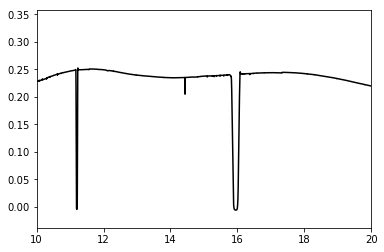

In [14]:
plt.plot(ls1_ch3_0x-ls1_ch3_0x[0], ls1_ch3_0y,'k')
plt.xlim(10,20)
plt.show()

/Users/JanviMadhani/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


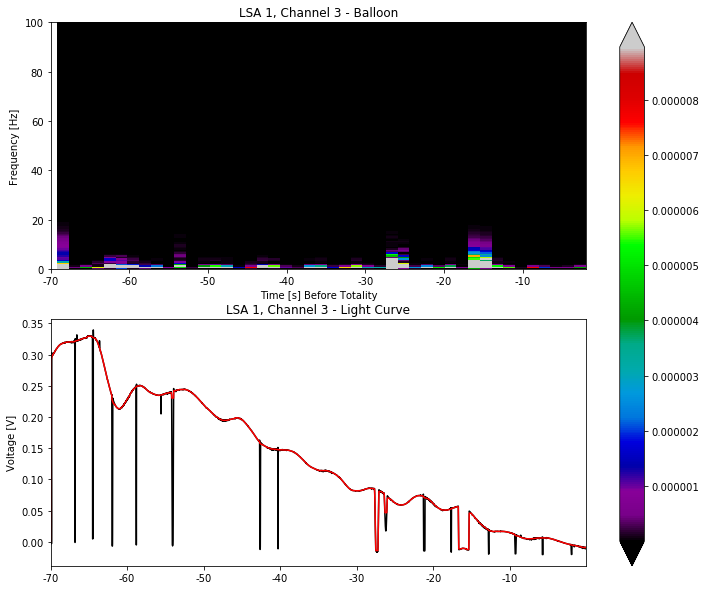

In [15]:
fig, axs = plt.subplots(2, 1,figsize=(12,10))

s_1 = axs[0].pcolormesh(t18, f18, Sxx18,cmap='spectral',vmin = min(Sxx16[0]), vmax = max(Sxx16[0]))
axs[0].set_xticks(np.arange(70,step=10))
axs[0].set_xticklabels( ['-70','-60', '-50','-40', '-30', '-20','-10'])
axs[0].set_ylim(0,100)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('LSA 1, Channel 3 - Balloon')
axcb = fig.colorbar(s_1, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')

s_2= axs[1].plot(ls1_ch3_0x-ls1_ch3_0x[0], ls1_ch3_0y,'k')
axs[1].plot(ls1_ch3_0x-ls1_ch3_0x[0],bmedch3,'r')
axs[1].set_ylabel('Voltage [V]')
axs[1].set_xlim(0,70)
axs[1].set_xticks(np.arange(70,step=10))
axs[1].set_xticklabels( ['-70','-60', '-50','-40', '-30', '-20','-10'])
axs[1].set_title('LSA 1, Channel 3 - Light Curve')




#plt.savefig('BalloonLCwCH1.pdf')

In [16]:
print(len(ls1_ch1_0y))
print(len(bmedch1))

42079
42079


In [17]:
ls1add = (ls1_ch1_0y[:42079]+ls1_ch2_0y[:42079]+ls1_ch3_0y[:42079]+ls1_ch4_0y[:42079])
newnormx1, newnormy1,newclipx1,newclipy1 = sigmaclip(ls1_ch1_0x,ls1add,sec=70)
med_ball = find_median_4(ls1_ch1_0y[:42079],ls1_ch2_0y[:42079],ls1_ch3_0y[:42079],ls1_ch4_0y[:42079],vector = True)



plt.figure(figsize=(12,8))

#plt.plot(ls1_ch1_0x-ls1_ch1_0x[0], ls1_ch1_0y,label='ch 1')
#plt.plot(ls1_ch1_0x-ls1_ch1_0x[0],signal.medfilt(ls1_ch1_0y,301),label='medfilt-ch1')

#plt.plot(ls1_ch2_0x-ls1_ch2_0x[0], ls1_ch2_0y,label='ch 2')
#plt.plot(ls1_ch2_0x-ls1_ch2_0x[0],signal.medfilt(ls1_ch2_0y,301),label='medfilt-ch2')

#plt.plot(ls1_ch3_0x-ls1_ch3_0x[0], ls1_ch3_0y,label='ch 3')
#plt.plot(ls1_ch3_0x-ls1_ch3_0x[0],signal.medfilt(ls1_ch3_0y,301),label='medfilt-ch3')

plt.plot(ls1_ch4_0x-ls1_ch4_0x[0], ls1_ch4_0y,label='ch 4')
plt.plot(ls1_ch4_0x-ls1_ch4_0x[0],signal.medfilt(ls1_ch4_0y,301),label='medfilt-ch4')

#plt.plot(ls1_ch1_0x-ls1_ch1_0x[0],ls1add,label='just added')
#plt.plot(ls1_ch1_0x-ls1_ch1_0x[0],med_ball, label='median')
#plt.plot(newnormx1,newnormy1,marker=',',markersize='10',ls= ' ',c='lightblue',alpha=0.7,label='Normalized')
#plt.plot(newclipx1,newclipy1,marker=',',markersize='5',ls= ' ',c='darkblue',alpha=0.7,label='clipped')
plt.ylabel('Voltage [V]')
#plt.xlim(20,30)
#plt.xticks(np.arange(70,step=10),('-70', '-60', '-50','-40', '-30', '-20','-10'))
plt.xlabel('Time [s]')
plt.legend()
plt.show()


NameError: name 'find_median_4' is not defined

/Users/JanviMadhani/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


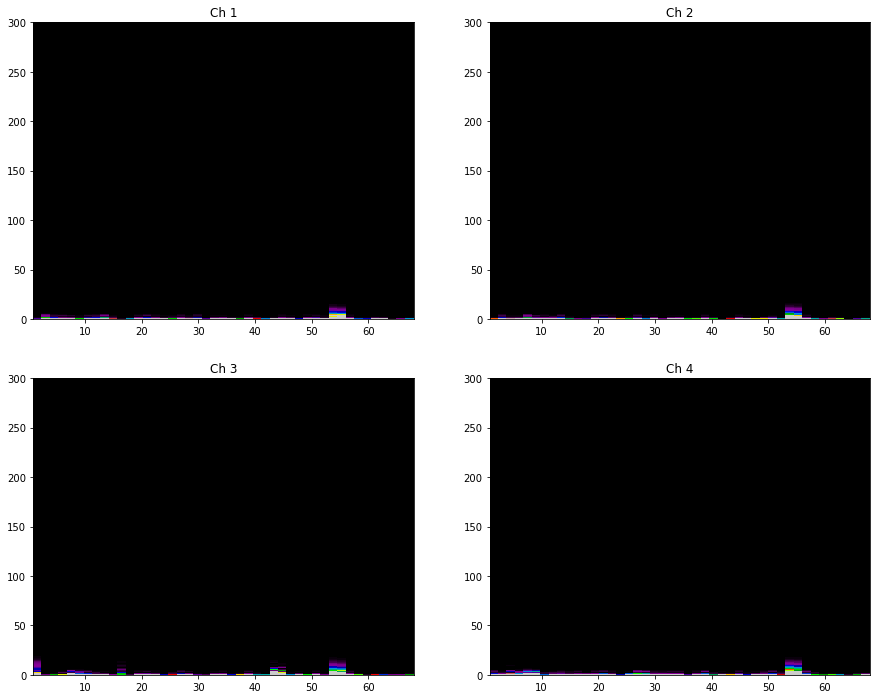

In [18]:
"""
ALL OF LS 1 
"""

plt.figure(figsize=(15,12))

plt.subplot(221)
plt.pcolormesh(t16,f16,Sxx16,cmap='spectral',vmin=min(Sxx16[0]),vmax=max(Sxx16[0]))
plt.title('Ch 1')

plt.subplot(222)
plt.pcolormesh(t17,f17,Sxx17,cmap='spectral',vmin=min(Sxx16[0]),vmax=max(Sxx16[0]))
plt.title('Ch 2')

plt.subplot(223)
plt.pcolormesh(t18,f18,Sxx18,cmap='spectral',vmin=min(Sxx16[0]),vmax=max(Sxx16[0]))
plt.title('Ch 3')

plt.subplot(224)
plt.pcolormesh(t19,f19,Sxx19,cmap='spectral',vmin=min(Sxx19[0]),vmax=max(Sxx19[0]))
plt.title('Ch 4')

plt.show()

In [19]:
plt.figure(figsize=(12,8))
plt.pcolormesh(t16,f16,find_median_4(Sxx16,Sxx17,Sxx18,Sxx19),cmap='binary',vmin=.4e-10,vmax=800e-10)
plt.xticks(np.arange(70,step=10), ( '-70','-60', '-50','-40', '-30', '-20','-10'))
plt.xlabel('Time [s] Before Totality')
plt.title('Median of all 4 Channels of LSA 1 ')
plt.ylim(0,20)

plt.colorbar(orientation='vertical',extend='both')

#plt.savefig('MedianLS1.pdf')

NameError: name 'find_median_4' is not defined

## Grayscale LS1 

In [20]:

seconds = 60
startt = 3000 #40 
start = int(startt*600)
end = int(seconds*600)
endt = int(2.75*seconds*600) #3 minutes

bmedfull = signal.medfilt(ls1ch1y,301)

tc1=ls1ch1x[int(5126*600):int(5126*600)+end]
#vc1=ls1ch1y[int(5126*600):int(5126*600)+end]
vc1 = bmedfull[int(5126*600):int(5126*600)+end]

tc2 = ls1ch1x[int(525*600):int(525*600)+end]
#vc2 = ls1ch1y[int(525*600):int(525*600)+end]
vc2 = bmedfull[int(525*600):int(525*600)+end]

tc3 = ls1ch1x[int(4926*600):int(4926*600)+end]
#vc3 = ls1ch1y[int(4926*600):int(4926*600)+end]
vc3 = bmedfull[int(4926*600):int(4926*600)+end]

tc4 = ls1ch1x[int(5346*600):int(5346*600)+end]
#vc4 = ls1ch1y[int(5346*600):int(5346*600)+end]
vc4 = bmedfull[int(5346*600):int(5346*600)+end]

t1totality = ls1ch1x[int(5186*600):int(5346*600)]
v1totality = ls1ch1y[int(5186*600):int(5346*600)]

KeyboardInterrupt: 

In [ ]:
print(t1totality[0])

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(ls1ch1x,ls1ch1y,c='lightsteelblue',label='Raw Data')
plt.plot(tc1,vc1,c='darkslateblue',label='Shadow Bands')
plt.plot(tc2,vc2,c='steelblue', label ='Before Shadow Bands')
plt.plot(tc3,vc3,c='red',label='Possible Shadow Bands')
plt.plot(tc4,vc4,c='black',label='After Totality')
#plt.plot(t1totality,v1totality,c='red',label='Totality')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Eclipse Light Curve of LS1 Ch 1 - Balloon Array')
plt.legend(prop={'size': 12})
plt.show()
#plt.savefig('EclipseLC.pdf')

In [ ]:
8+165

In [ ]:
fg1, tg1, Sg1 = signal.spectrogram(vc1, fs,nperseg=256*4) #Shadow bands
fg2, tg2, Sg2 = signal.spectrogram(vc2, fs,nperseg=256*4) #Before sb
fg3, tg3, Sg3 = signal.spectrogram(vc3, fs,nperseg=256*4) #possible sb
fg4, tg4, Sg4 = signal.spectrogram(vc4, fs,nperseg=256*4) #after totality

In [ ]:


fig, axs = plt.subplots(2, 2,figsize=(16,15))

plt1 = axs[0,0].pcolormesh(tg2, fg2, Sg2,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,0].set_xticks(np.arange(60,step=10))
axs[0,0].set_xticklabels( ['-4660', '-4650','-4640', '-4630', '-4620','-4610'])
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel('Frequency [Hz]')
axs[0,0].set_xlabel('Time [s] Before Totality')
axs[0,0].set_title('Before Shadow Bands Seen on Ground - LSA 1')
axcb = fig.colorbar(plt1, ax=axs.ravel().tolist(), extend='both',orientation = 'horizontal')



plt2 = axs[0,1].pcolormesh(tg3, fg3, Sg3,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[0,1].set_xticks(np.arange(60,step=10))
axs[0,1].set_xticklabels( ['-260', '-250','-240', '-230', '-220','-210'])
axs[0,1].set_ylim(0,30)
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [s] Before Totality')
axs[0,1].set_title('Possible Shadow Bands Seen on Ground - LSA 1')



plt3 = axs[1,0].pcolormesh(tg1, fg1, Sg1,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,0].set_xticks(np.arange(60,step=10))
axs[1,0].set_xticklabels( ['-60', '-50','-40', '-30', '-20','-10'])
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel('Frequency [Hz]')
axs[1,0].set_xlabel('Time [s] Before Totality')
axs[1,0].set_title('Shadow Bands Seen on Ground Before Totality - LSA 1')

plt4 = axs[1,1].pcolormesh(tg4, fg4, Sg4,cmap='binary',vmin=.4e-10,vmax=800e-10)
axs[1,1].set_xticks(np.arange(60,step=10))
axs[1,1].set_xticklabels( ['173', '183','193', '203', '213','223'])
axs[1,1].set_ylim(0,30)
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [s] After Totality')
axs[1,1].set_title('Shadow Bands Seen on Ground After Totality - LSA 1')




#plt.savefig('LS1CH1_GrayScale.pdf')

## Power Spectrum - LS 2


In [ ]:
print(len(ls2_ch1_0y))
print(5*600)

In [ ]:
seconds_ = 5
startt_ = 30  #seconds into the sample
start_ = int(startt_*600)
end_ = int(seconds_*600)

ps1 = ls2_ch1_0y[start_:start_+end_]
ps2 = ls2_ch2_0y[start_:start_+end_]
ps3 = ls2_ch3_0y[start_:start_+end_]
ps4 = ls2_ch4_0y[start_:start_+end_]


plt.plot(ls2_ch1_0x, ls2_ch1_0y,marker=',',ls='-',c='lightblue')
plt.plot(ls2_ch1_0x[start_:start_+end_],ls2_ch1_0y[start_:start_+end_],'b,-')
plt.show()

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(221)
plt.psd(ps1,512*2,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,75)
plt.title('LS2 - Channel 1')

plt.subplot(222)
plt.psd(ps2,512*2,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,25)
plt.title('LS2 - Channel 2')

plt.subplot(223)
plt.psd(ps3,512*2,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,25)
plt.title('LS2 - Channel 3')

plt.subplot(224)
plt.psd(ps4,512*2,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,25)
plt.title('LS2 - Channel 4')


plt.show()
#plt.savefig('LS2_PSD.pdf')


## Power Spectrum - LS 3 (CLEAR)

In [ ]:
ps5 = ls3_ch1_0y
ps6 = ls3_ch2_0y
ps7 = ls3_ch3_0y
ps8 = ls3_ch4_0y

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(221)
plt.psd(ps5,512,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,40)
plt.title('LS3 - Channel 1')

plt.subplot(222)
plt.psd(ps6,512,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,40)
plt.title('LS3 - Channel 2')

plt.subplot(223)
plt.psd(ps7,512,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,40)
plt.title('LS3 - Channel 3')

plt.subplot(224)
plt.psd(ps8,512,600,ls='-',color='purple',marker='o',mec='purple',mfc='thistle')
plt.xlim(-1,40)
plt.title('LS3 - Channel 4')


#plt.show()
#plt.savefig('LS3_psd.pdf')

In [ ]:
normalize mean to 100

In [ ]:
"""
ch1normx, ch1normy, ch1clipx, ch1clipy = sigmaclip(ls2_ch1_0x,ls2_ch1_0y,sec=60)
ch2normx, ch2normy, ch2clipx, ch2clipy = sigmaclip(ls2_ch2_0x,ls2_ch2_0y,sec=60)
ch3normx, ch3normy, ch3clipx, ch3clipy = sigmaclip(ls2_ch3_0x,ls2_ch3_0y,sec=60)
ch4normx, ch4normy, ch4clipx, ch4clipy = sigmaclip(ls2_ch4_0x,ls2_ch4_0y,sec=60)


ch1f, ch1t, ch1S = signal.spectrogram(ch1clipy, fs,nperseg=256*4)
ch2f, ch2t, ch2S = signal.spectrogram(ch2clipy, fs,nperseg=256*4)
ch3f, ch3t, ch3S = signal.spectrogram(ch3clipy, fs,nperseg=256*4)
ch4f, ch4t, ch4S = signal.spectrogram(ch4clipy, fs,nperseg=256*4)

"""





# FINAL FIGURES OCT 2019

In [ ]:
print(5175-4*(60))
print(5175-2*(60))
print(5340+120)
print(5340-5175)
print(165+120)


In [24]:
#totality in ls2 [5175*600:5340*600]
#sb = -2 min to 0 
#psb = -4 min to -2 min
#asb = 0 to 2 min

## LSA 2

## psb 
a,b,lsa2_ch1_clipx_psb, lsa2_ch1_clipy_psb = sigmaclip(xfull,yfull,start=4935,sec=140)
a,b,lsa2_ch2_clipx_psb, lsa2_ch2_clipy_psb = sigmaclip(xfull2,yfull2,start=4935,sec=140)
a,b,lsa2_ch3_clipx_psb, lsa2_ch3_clipy_psb = sigmaclip(xfull3,yfull3,start=4935,sec=140)
a,b,lsa2_ch4_clipx_psb, lsa2_ch4_clipy_psb = sigmaclip(xfull4,yfull4,start=4935,sec=140)


lsa2_ch1f_psb, lsa2_ch1t_psb, lsa2_ch1S_psb = signal.spectrogram(lsa2_ch1_clipy_psb, fs,nperseg=1200)
lsa2_ch2f_psb, lsa2_ch2t_psb, lsa2_ch2S_psb = signal.spectrogram(lsa2_ch2_clipy_psb, fs,nperseg=1200)
lsa2_ch3f_psb, lsa2_ch3t_psb, lsa2_ch3S_psb = signal.spectrogram(lsa2_ch3_clipy_psb, fs,nperseg=1200)
lsa2_ch4f_psb, lsa2_ch4t_psb, lsa2_ch4S_psb = signal.spectrogram(lsa2_ch4_clipy_psb, fs,nperseg=1200)

avg_sigclip_ls2_psb = (lsa2_ch1S_psb[:601,:68]+lsa2_ch2S_psb[:601,:68]+lsa2_ch3S_psb[:601,:68]+lsa2_ch4S_psb[:601,:68])/4

## sb 
a,b,lsa2_ch1_clipx_sb, lsa2_ch1_clipy_sb = sigmaclip(xfull,yfull,start=5075,sec=140)
a,b,lsa2_ch2_clipx_sb, lsa2_ch2_clipy_sb = sigmaclip(xfull2,yfull2,start=5075,sec=140)
a,b,lsa2_ch3_clipx_sb, lsa2_ch3_clipy_sb = sigmaclip(xfull3,yfull3,start=5075,sec=140)
a,b,lsa2_ch4_clipx_sb, lsa2_ch4_clipy_sb = sigmaclip(xfull4,yfull4,start=5075,sec=140)


lsa2_ch1f_sb, lsa2_ch1t_sb, lsa2_ch1S_sb = signal.spectrogram(lsa2_ch1_clipy_sb, fs,nperseg=1200)
lsa2_ch2f_sb, lsa2_ch2t_sb, lsa2_ch2S_sb = signal.spectrogram(lsa2_ch2_clipy_sb, fs,nperseg=1200)
lsa2_ch3f_sb, lsa2_ch3t_sb, lsa2_ch3S_sb = signal.spectrogram(lsa2_ch3_clipy_sb, fs,nperseg=1200)
lsa2_ch4f_sb, lsa2_ch4t_sb, lsa2_ch4S_sb = signal.spectrogram(lsa2_ch4_clipy_sb, fs,nperseg=1200)

avg_sigclip_ls2_sb = (lsa2_ch1S_sb[:601,:70]+lsa2_ch2S_sb[:601,:70]+lsa2_ch3S_sb[:601,:70]+lsa2_ch4S_sb[:601,:70])/4

#asb
a,b,lsa2_ch1_clipx_asb, lsa2_ch1_clipy_asb = sigmaclip(xfull,yfull,start=5340,sec=140)
a,b,lsa2_ch2_clipx_asb, lsa2_ch2_clipy_asb = sigmaclip(xfull2,yfull2,start=5340,sec=140)
a,b,lsa2_ch3_clipx_asb, lsa2_ch3_clipy_asb = sigmaclip(xfull3,yfull3,start=5340,sec=140)
a,b,lsa2_ch4_clipx_asb, lsa2_ch4_clipy_asb = sigmaclip(xfull4,yfull4,start=5340,sec=140)


lsa2_ch1f_asb, lsa2_ch1t_asb, lsa2_ch1S_asb = signal.spectrogram(lsa2_ch1_clipy_asb, fs,nperseg=1200)
lsa2_ch2f_asb, lsa2_ch2t_asb, lsa2_ch2S_asb = signal.spectrogram(lsa2_ch2_clipy_asb, fs,nperseg=1200)
lsa2_ch3f_asb, lsa2_ch3t_asb, lsa2_ch3S_asb = signal.spectrogram(lsa2_ch3_clipy_asb, fs,nperseg=1200)
lsa2_ch4f_asb, lsa2_ch4t_asb, lsa2_ch4S_asb = signal.spectrogram(lsa2_ch4_clipy_asb, fs,nperseg=1200)

avg_sigclip_ls2_asb = (lsa2_ch1S_asb+lsa2_ch2S_asb+lsa2_ch3S_asb+lsa2_ch4S_asb)/4



In [ ]:
#plt.plot(xfull4,yfull4)
plt.plot(a,b)
plt.show()

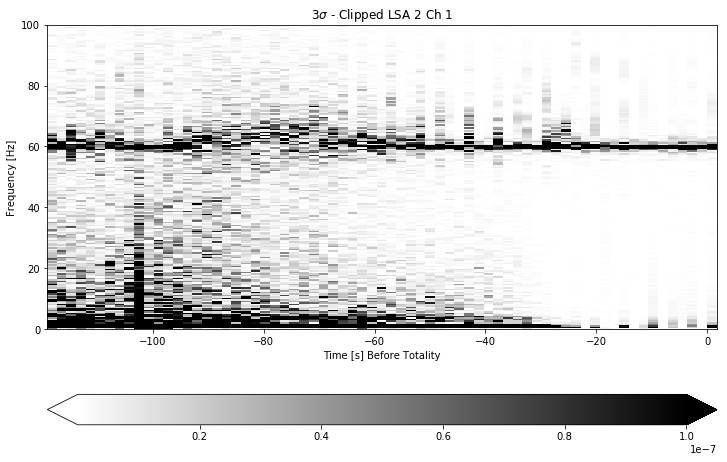

In [28]:
fig, axs = plt.subplots(1, 1,figsize=(12,8))



#plt1 = axs.pcolormesh(lsa2_ch1t_sb,lsa2_ch1f_sb,avg_sigclip_ls2_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
plt1 = axs.pcolormesh(lsa2_ch1t_sb-120,lsa2_ch1f_sb,lsa2_ch1S_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs.set_xticks(np.arange(110,step=10))
#axs.set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs.set_ylim(0,100)
axs.set_title('3$\sigma$ - Clipped LSA 2 Ch 1')
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [s] Before Totality')
axcb = fig.colorbar(plt1,extend='both',orientation = 'horizontal')


In [ ]:
print('totality = 5175')
print(166/2)
print(5175+83)
print(5258-3*60)
print(5258+3*60)
print(60*6)
print(5078+360)
print(5175-5078)

In [30]:
a,b,lsa2_ch1_clipx, lsa2_ch1_clipy = sigmaclip(xfull,yfull,start=5078,sec=360)
a,b,lsa2_ch2_clipx, lsa2_ch2_clipy = sigmaclip(xfull2,yfull2,start=5078,sec=360)
a,b,lsa2_ch3_clipx, lsa2_ch3_clipy = sigmaclip(xfull3,yfull3,start=5078,sec=360)
a,b,lsa2_ch4_clipx, lsa2_ch4_clipy = sigmaclip(xfull4,yfull4,start=5078,sec=360)


lsa2_ch1f, lsa2_ch1t, lsa2_ch1S = signal.spectrogram(lsa2_ch1_clipy, fs,nperseg=1200)
lsa2_ch2f, lsa2_ch2t, lsa2_ch2S = signal.spectrogram(lsa2_ch2_clipy, fs,nperseg=1200)
lsa2_ch3f, lsa2_ch3t, lsa2_ch3S = signal.spectrogram(lsa2_ch3_clipy, fs,nperseg=1200)
lsa2_ch4f, lsa2_ch4t, lsa2_ch4S = signal.spectrogram(lsa2_ch4_clipy, fs,nperseg=1200)

avg_sigclip_ls2 = (lsa2_ch1S[:601,:191]+lsa2_ch2S[:601,:191]+lsa2_ch3S[:601,:191]+lsa2_ch4S[:601,:191])/4






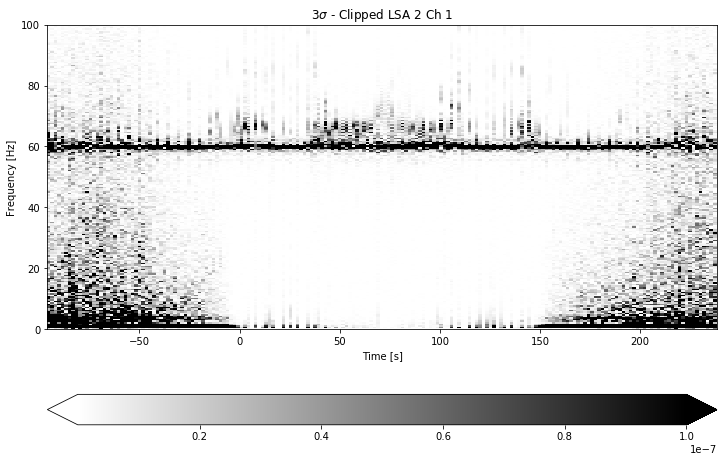

In [47]:
fig, axs = plt.subplots(1, 1,figsize=(12,8))

plt1 = axs.pcolormesh(lsa2_ch1t-97,lsa2_ch1f,lsa2_ch1S,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs.set_xticks(np.arange(110,step=10))
#axs.set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs.set_ylim(0,100)
axs.set_title('3$\sigma$ - Clipped LSA 2 Ch 1')
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [s]')
axcb = fig.colorbar(plt1,extend='both',orientation = 'horizontal')

#plt.savefig('Figure_4.pdf')

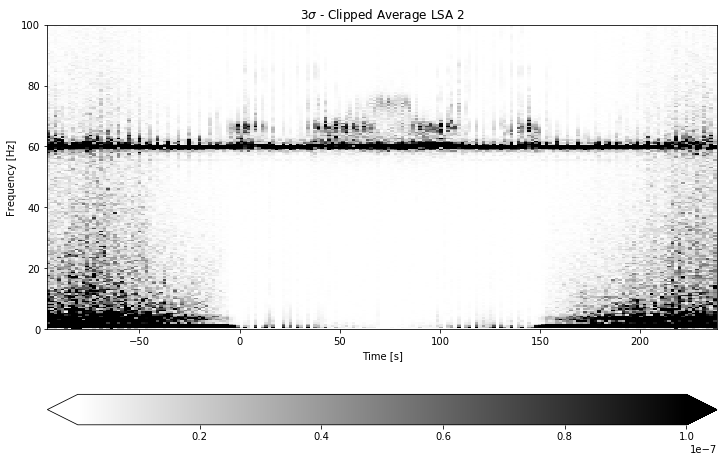

In [48]:
fig, axs = plt.subplots(1, 1,figsize=(12,8))

plt1 = axs.pcolormesh(lsa2_ch1t-97,lsa2_ch1f,avg_sigclip_ls2,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs.set_xticks(np.arange(110,step=10))
#axs.set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs.set_ylim(0,100)
axs.set_title('3$\sigma$ - Clipped Average LSA 2')
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [s]')
axcb = fig.colorbar(plt1,extend='both',orientation = 'horizontal')

#plt.savefig('Figure_5.pdf')

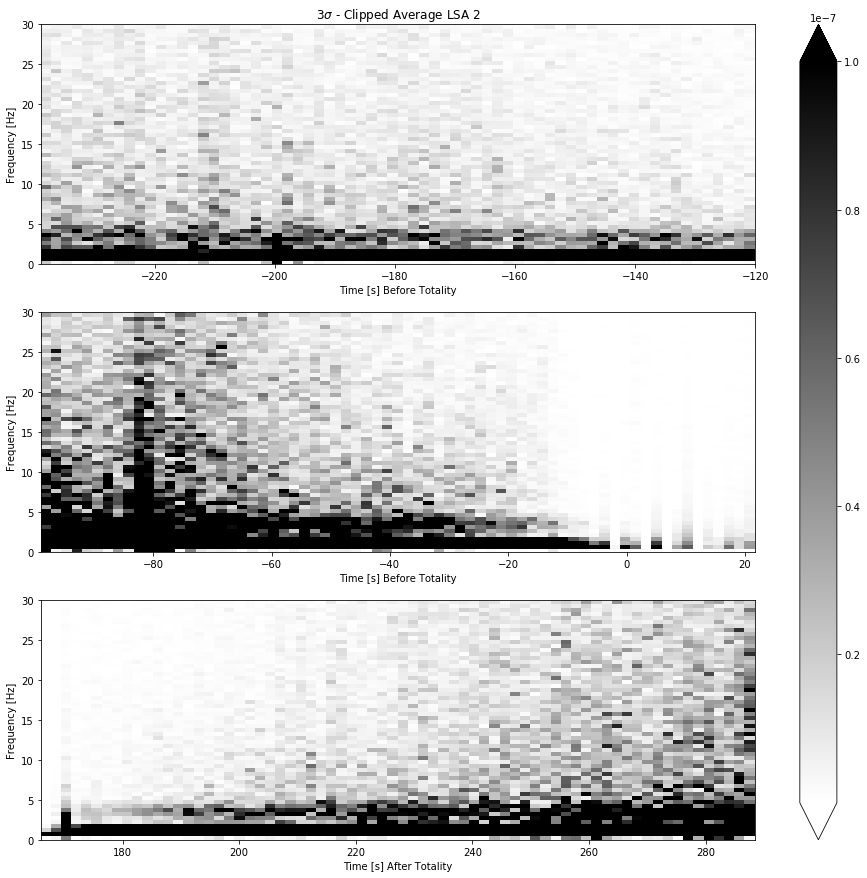

In [49]:
fig, axs = plt.subplots(3, 1,figsize=(16,15))

s1 = axs[0].pcolormesh(lsa2_ch1t_psb-240,lsa2_ch1f_psb,avg_sigclip_ls2_psb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[0].set_xticks(np.arange(110,step=10))
#axs[0].set_xticklabels( ['-240','-230','-220','-210','-200','-190','-180', '-170','-160', '-150', '-140','-130'])
axs[0].set_ylim(0,30)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('3$\sigma$ - Clipped Average LSA 2')
axcb = fig.colorbar(s1, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')


s2 = axs[1].pcolormesh(lsa2_ch1t_sb-100,lsa2_ch1f_sb,avg_sigclip_ls2_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[1].set_xticks(np.arange(110,step=10))
#axs[1].set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs[1].set_ylim(0,30)
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [s] Before Totality')



s3 = axs[2].pcolormesh(lsa2_ch1t_asb+165,lsa2_ch1f_asb,avg_sigclip_ls2_asb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[2].set_xticks(np.arange(110,step=10))
#axs[2].set_xticklabels( ['165', '175','185', '195', '205','215','225','235','245','255','265','275','285'])
axs[2].set_ylim(0,30)
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s] After Totality')




#plt.savefig('Figure_6.pdf')

# Colored Filter - Import Full Length Data

In [33]:
#data17 = np.genfromtxt("LS3CH1_5110.0-5170.0sec.txt", autostrip = True)
#ls3_ch1_0x, ls3_ch1_0y = data17[:,0],data17[:,1]

#LS 3(clear)

data_ls3_ch1 = np.genfromtxt('LS3CH1.txt')
ls3_ch1_xfull1, ls3_ch1_yfull1 = data_ls3_ch1[:,1],data_ls3_ch1[:,0]

data_ls3_ch2 = np.genfromtxt('LS3CH2.txt')
ls3_ch2_xfull2, ls3_ch2_yfull2 = data_ls3_ch2[:,1],data_ls3_ch2[:,0]

data_ls3_ch3 = np.genfromtxt('LS3CH3.txt')
ls3_ch3_xfull3, ls3_ch3_yfull3 = data_ls3_ch3[:,1],data_ls3_ch3[:,0]

data_ls3_ch4 = np.genfromtxt('LS3CH4.txt')
ls3_ch4_xfull4, ls3_ch4_yfull4 = data_ls3_ch4[:,1],data_ls3_ch4[:,0]


#LS 4(Blue)

data_ls4_ch1 = np.genfromtxt('LS4CH1.txt')
ls4_ch1_xfull1, ls4_ch1_yfull1 = data_ls4_ch1[:,1],data_ls4_ch1[:,0]

data_ls4_ch2 = np.genfromtxt('LS4CH2.txt')
ls4_ch2_xfull2, ls4_ch2_yfull2 = data_ls4_ch2[:,1],data_ls4_ch2[:,0]

data_ls4_ch3 = np.genfromtxt('LS4CH3.txt')
ls4_ch3_xfull3, ls4_ch3_yfull3 = data_ls4_ch3[:,1],data_ls4_ch3[:,0]

data_ls4_ch4 = np.genfromtxt('LS4CH4.txt')
ls4_ch4_xfull4, ls4_ch4_yfull4 = data_ls4_ch4[:,1],data_ls4_ch4[:,0]

#LS 5(Red)

data_ls5_ch1 = np.genfromtxt('LS5CH1.txt')
ls5_ch1_xfull1, ls5_ch1_yfull1 = data_ls5_ch1[:,1],data_ls5_ch1[:,0]

data_ls5_ch2 = np.genfromtxt('LS5CH2.txt')
ls5_ch2_xfull2, ls5_ch2_yfull2 = data_ls5_ch2[:,1],data_ls5_ch2[:,0]

data_ls5_ch3 = np.genfromtxt('LS5CH3.txt')
ls5_ch3_xfull3, ls5_ch3_yfull3 = data_ls5_ch3[:,1],data_ls5_ch3[:,0]

data_ls5_ch4 = np.genfromtxt('LS5CH4.txt')
ls5_ch4_xfull4, ls5_ch4_yfull4 = data_ls5_ch4[:,1],data_ls5_ch4[:,0]

In [45]:
##Sigma Clip then average from -2 min to 0 min
#totality time = 3360

fs = 600

#LS3(clear)

a,b,lsa3_ch1_clipx_sb, lsa3_ch1_clipy_sb = sigmaclip(ls3_ch1_xfull1, ls3_ch1_yfull1,start=3260,sec=140)
a,b,lsa3_ch2_clipx_sb, lsa3_ch2_clipy_sb = sigmaclip(ls3_ch2_xfull2, ls3_ch2_yfull2,start=3260,sec=140)
a,b,lsa3_ch3_clipx_sb, lsa3_ch3_clipy_sb = sigmaclip(ls3_ch3_xfull3, ls3_ch3_yfull3,start=3260,sec=140)
a,b,lsa3_ch4_clipx_sb, lsa3_ch4_clipy_sb = sigmaclip(ls3_ch4_xfull4, ls3_ch4_yfull4,start=3260,sec=140)


lsa3_ch1f_sb, lsa3_ch1t_sb, lsa3_ch1S_sb = signal.spectrogram(lsa3_ch1_clipy_sb, fs,nperseg=1200)
lsa3_ch2f_sb, lsa3_ch2t_sb, lsa3_ch2S_sb = signal.spectrogram(lsa3_ch2_clipy_sb, fs,nperseg=1200)
lsa3_ch3f_sb, lsa3_ch3t_sb, lsa3_ch3S_sb = signal.spectrogram(lsa3_ch3_clipy_sb, fs,nperseg=1200)
lsa3_ch4f_sb, lsa3_ch4t_sb, lsa3_ch4S_sb = signal.spectrogram(lsa3_ch4_clipy_sb, fs,nperseg=1200)

avg_sigclip_ls3_sb = (lsa3_ch1S_sb[:601,:71]+lsa3_ch2S_sb[:601,:71]+lsa3_ch3S_sb[:601,:71]+lsa3_ch4S_sb[:601,:71])/4

#LS4(blue)

a,b,lsa4_ch1_clipx_sb, lsa4_ch1_clipy_sb = sigmaclip(ls4_ch1_xfull1, ls4_ch1_yfull1,start=3260,sec=140)
a,b,lsa4_ch2_clipx_sb, lsa4_ch2_clipy_sb = sigmaclip(ls4_ch2_xfull2, ls4_ch2_yfull2,start=3260,sec=140)
a,b,lsa4_ch3_clipx_sb, lsa4_ch3_clipy_sb = sigmaclip(ls4_ch3_xfull3, ls4_ch3_yfull3,start=3260,sec=140)
a,b,lsa4_ch4_clipx_sb, lsa4_ch4_clipy_sb = sigmaclip(ls4_ch4_xfull4, ls4_ch4_yfull4,start=3260,sec=140)


lsa4_ch1f_sb, lsa4_ch1t_sb, lsa4_ch1S_sb = signal.spectrogram(lsa4_ch1_clipy_sb, fs,nperseg=1200)
lsa4_ch2f_sb, lsa4_ch2t_sb, lsa4_ch2S_sb = signal.spectrogram(lsa4_ch2_clipy_sb, fs,nperseg=1200)
lsa4_ch3f_sb, lsa4_ch3t_sb, lsa4_ch3S_sb = signal.spectrogram(lsa4_ch3_clipy_sb, fs,nperseg=1200)
lsa4_ch4f_sb, lsa4_ch4t_sb, lsa4_ch4S_sb = signal.spectrogram(lsa4_ch4_clipy_sb, fs,nperseg=1200)

avg_sigclip_ls4_sb = (lsa4_ch1S_sb[:601,:70]+lsa4_ch2S_sb[:601,:70]+lsa4_ch3S_sb[:601,:70]+lsa4_ch4S_sb[:601,:70])/4

#LS5(red)

a,b,lsa5_ch1_clipx_sb, lsa5_ch1_clipy_sb = sigmaclip(ls5_ch1_xfull1, ls5_ch1_yfull1,start=3260,sec=140)
a,b,lsa5_ch2_clipx_sb, lsa5_ch2_clipy_sb = sigmaclip(ls5_ch2_xfull2, ls5_ch2_yfull2,start=3260,sec=140)
a,b,lsa5_ch3_clipx_sb, lsa5_ch3_clipy_sb = sigmaclip(ls5_ch3_xfull3, ls5_ch3_yfull3,start=3260,sec=140)
a,b,lsa5_ch4_clipx_sb, lsa5_ch4_clipy_sb = sigmaclip(ls5_ch4_xfull4, ls5_ch4_yfull4,start=3260,sec=140)


lsa5_ch1f_sb, lsa5_ch1t_sb, lsa5_ch1S_sb = signal.spectrogram(lsa5_ch1_clipy_sb, fs,nperseg=1200)
lsa5_ch2f_sb, lsa5_ch2t_sb, lsa5_ch2S_sb = signal.spectrogram(lsa5_ch2_clipy_sb, fs,nperseg=1200)
lsa5_ch3f_sb, lsa5_ch3t_sb, lsa5_ch3S_sb = signal.spectrogram(lsa5_ch3_clipy_sb, fs,nperseg=1200)
lsa5_ch4f_sb, lsa5_ch4t_sb, lsa5_ch4S_sb = signal.spectrogram(lsa5_ch4_clipy_sb, fs,nperseg=1200)

avg_sigclip_ls5_sb = (lsa5_ch1S_sb[:601,:70]+lsa5_ch2S_sb[:601,:70]+lsa5_ch3S_sb[:601,:70]+lsa5_ch4S_sb[:601,:70])/4

In [ ]:
start = 3240
plt.figure(figsize=(12,8))

plt.plot(ls5_ch1_xfull1, ls5_ch1_yfull1,label='ls4')
plt.plot(ls5_ch1_xfull1[int(start)*600:(int(start)+120)*600], ls5_ch1_yfull1[int(start)*600:(int(start)+120)*600],label='2min')
#plt.plot(ls4_ch1_xfull1, ls4_ch1_yfull1,label='ls4')
#plt.plot(ls5_ch1_xfull1, ls5_ch1_yfull1,label='ls5')
plt.legend()
plt.show()


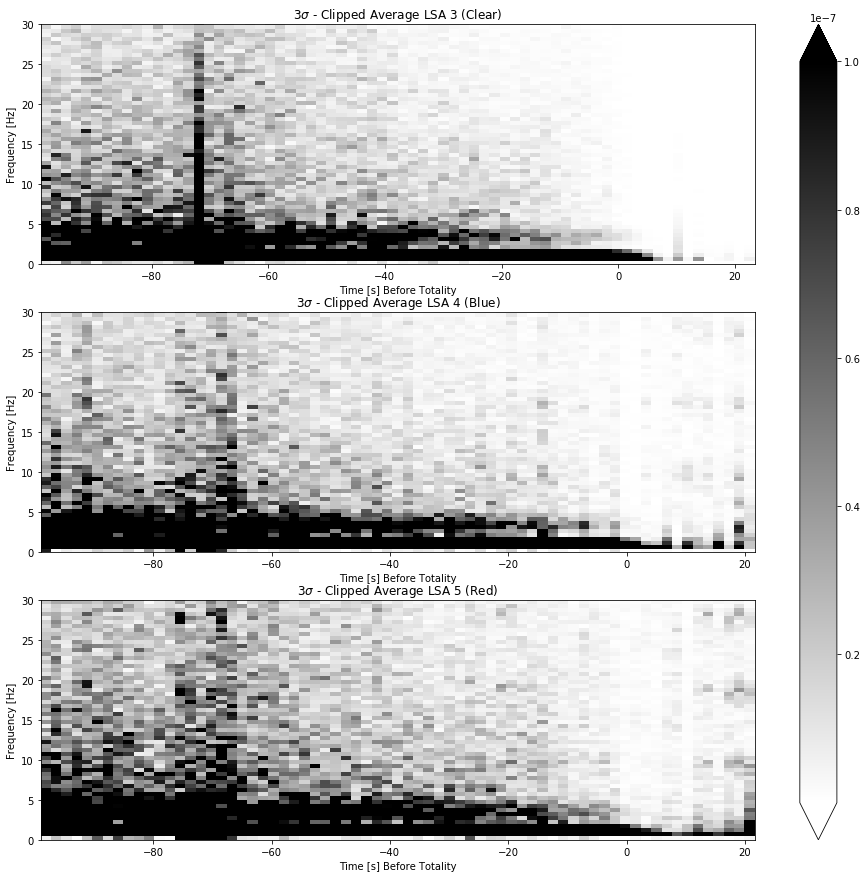

In [50]:
fig, axs = plt.subplots(3, 1,figsize=(16,15))

s1 = axs[0].pcolormesh(lsa3_ch1t_sb-100,lsa3_ch1f_sb,avg_sigclip_ls3_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[0].set_xticks(np.arange(110,step=10))
#axs[0].set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs[0].set_ylim(0,30)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [s] Before Totality')
axs[0].set_title('3$\sigma$ - Clipped Average LSA 3 (Clear)')
axcb = fig.colorbar(s1, ax=axs.ravel().tolist(), extend='both',orientation = 'vertical')


s2 = axs[1].pcolormesh(lsa4_ch1t_sb[:70]-100,lsa4_ch1f_sb,avg_sigclip_ls4_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[1].set_xticks(np.arange(110,step=10))
#axs[1].set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs[1].set_ylim(0,30)
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [s] Before Totality')
axs[1].set_title('3$\sigma$ - Clipped Average LSA 4 (Blue)')



s3 = axs[2].pcolormesh(lsa5_ch1t_sb[:70]-100,lsa5_ch1f_sb,avg_sigclip_ls5_sb,cmap='binary',vmin=1e-13,vmax=1e-7)
#axs[2].set_xticks(np.arange(110,step=10))
#axs[2].set_xticklabels(['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs[2].set_ylim(0,30)
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s] Before Totality')
axs[2].set_title('3$\sigma$ - Clipped Average LSA 5 (Red)')




#plt.savefig('Figure_7.pdf')

In [ ]:
print(ls3_ch4_xfull4[5170*600])
print(len(ls3_ch4_xfull4)/600)
print()

In [ ]:
print(len(lsa2_ch1t_sb))
print(shape(lsa4_ch1S_sb))
print(shape(avg_sigclip_ls4_sb))
print(lsa2_ch1t_sb[-1])

In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(12,8))


plt1 = axs.pcolormesh(lsa3_ch1t_sb,lsa3_ch1f_sb,lsa3_ch1S_sb,cmap='binary')
axs.set_xticks(np.arange(120,step=10))
axs.set_xticklabels( ['-120','-110','-100','-90','-80','-70','-60', '-50','-40', '-30', '-20','-10'])
axs.set_ylim(0,100)
axs.set_title('3$\sigma$ - Clipped Average LSA 2')
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [s] Before Totality')
axcb = fig.colorbar(plt1,extend='both',orientation = 'horizontal')

In [ ]:
-4*60

In [ ]:
165+120